# A. Business Understanding

Proyek Predictive Analytics: Prediksi Harga IHSG (^JKSE)
Mengikuti Metode CRISP-DM 6 Fase

Problem Steatment:
- Pada saat ini jenis investasi banyak ragamnya salah satunya yaitu dibidang Saham, salah satu jenis saham yang sedang viral di indonesia saat ini ada IHSG karena terjadi penurunan terus menerus dan IHSG (^JKSE) juga memiliki tingkat volatilitas yang tinggi, sehingga menyulitkan investor dan analis dalam memprediksi harga penutupan secara akurat, yang berdampak pada pengambilan keputusan investasi.
- Di tengah tingginya volatilitas pasar saham, khususnya IHSG, kebutuhan akan sistem prediksi harga yang akurat menjadi semakin mendesak bagi pelaku industri keuangan dan investor untuk mengambil keputusan yang tepat dan mengurangi risiko kerugian. Namun, masih sangat minim riset yang secara spesifik membandingkan efektivitas berbagai pendekatan Machine Learning, terutama model deep learning seperti LSTM, CNN, dan GRU, dalam konteks prediksi harga penutupan IHSG. Ketiadaan referensi yang kuat dan teruji di lapangan menyebabkan banyak perusahaan dan institusi keuangan belum dapat memanfaatkan potensi teknologi ini secara optimal untuk mendukung strategi investasi dan pengelolaan portofolio.

Goals:
- Menghasilkan model prediksi IHSG yang mampu mengurangi nilai error (MSE, RMSE MAE, MAPE, dan R2) dengan membandingkan model LSTM, CNN, dan GRU secara individual.
- Memberikan insight kuantitatif dan visual terhadap kemampuan masing-masing model dalam menangkap pola harga historis IHSG dan memprediksi harga di masa depan.

Solution statements:
- Mengukur performa setiap model menggunakan metrik kuantitatif yang objektif seperti Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean absolute percentage error (MAPE), dan R-Squared ($R^2$).
- Mengimplementasikan dengan melatih tiga model deep learning secara terpisah: LSTM, CNN, dan GRU menggunakan dataset historis harga penutupan IHSG (^JKSE). Setelah itu melakukan prediksi dengan model yang memiliki matriks evaluasi terbaik.


**Untuk instalasi API, Framework, ataupun Library dapat dilakukan melalui file requirements.txt*

# B. Data Understanding

## 1. Instalasi Library yang dibutuhkan

In [1]:
!pip install yfinance==0.2.54

Penjelasan:

Perintah !pip install yfinance==0.2.54 adalah perintah untuk menginstal library yfinance dengan versi spesifik (0.2.54) menggunakan package manager pip dalam lingkup Python, perintah ini biasanya dijalankan di notebook seperti Jupyter Notebook atau Google Colab. dipilihnya versi 0.25.4 karena di versi itu data bisa di scrapping tanpa error


## 2. Import Library yang akan digunakan untuk tahapan data understanding


In [2]:
import yfinance as yf
import pandas as pd
import time
from datetime import datetime
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

Berikut adalah penjelasan mengenai library yang digunakan pada baris kode diatas:

- yfinance: Library untuk mengunduh data pasar saham dari Yahoo Finance.

- pandas: Library untuk manipulasi dan analisis data tabular.

- time: Library bawaan Python untuk operasi terkait waktu sistem.

- datetime: Library untuk manipulasi tanggal dan waktu.

- csv: Library untuk membaca dan menulis file CSV.

- os: Library untuk berinteraksi dengan sistem operasi.

- matplotlib: Library untuk membuat visualisasi data dasar.

- seaborn: Library visualisasi data statistik yang lebih estetis.

## 3. Mengambil data historis maksimal dari Yahoo Finance (Sumber Data)

Data yang saya gunakan merupakan dataset berjenis **TIME SERIES** dari data historis data historis harian dari Indeks Harga Saham Gabungan (disingkat IHSG; dalam bahasa Inggris: Indonesia Composite Index, ICI, atau IDX Composite) dan memiliki kode [ticker](https://academy.binance.com/en/glossary/ticker-symbol): ^JKSE.

Link tautan dataset: https://finance.yahoo.com/quote/%5EJKSE/

In [3]:
def fetch_jkse_historical():
    """
    Mengambil seluruh data historis IHSG dari awal hingga hari ini.
    """
    ticker = yf.Ticker("^JKSE")

    # Ambil data maksimum yang tersedia (dari awal hingga hari ini)
    df = ticker.history(period="max", actions=False)

    # Reset index dan ubah format tanggal
    df = df.reset_index()
    df = df.rename(columns={'Date': 'date'})

    # Konversi tipe data datetime ke string (opsional)
    df['date'] = df['date'].dt.strftime('%Y-%m-%d')

    return df

if __name__ == "__main__":
    try:
        # Ambil data historis
        historical_data = fetch_jkse_historical()

        # Simpan ke CSV
        historical_data.to_csv("jkse_historical.csv", index=False)
        print(f"Data berhasil disimpan! Jumlah baris: {len(historical_data)}")

    except Exception as e:
        print(f"Terjadi error: {str(e)}")

Data berhasil disimpan! Jumlah baris: 8539


Penjelasan:

Kode diatas berfungsi untuk mengambil seluruh data historis indeks IHSG (Indeks Harga Saham Gabungan) dari Yahoo Finance sejak pertama kali tercatat hingga hari ini. Fungsi utama bernama fetch_jkse_historical() menggunakan library yfinance untuk mengakses data IHSG dengan kode ticker "^JKSE".

Dalam fungsi tersebut, data diambil dengan periode maksimum yang tersedia menggunakan method history(), kemudian diolah dengan mereset index DataFrame dan mengubah nama kolom 'Date' menjadi 'date' untuk konsistensi. Tanggal juga dikonversi dari format datetime menjadi string dengan format tahun-bulan-hari agar lebih mudah dibaca.

Pada bagian eksekusi utama (main block), kode mencoba menjalankan fungsi pengambilan data dan menyimpan hasilnya ke file CSV bernama "jkse_historical.csv" tanpa menyertakan index. Jika proses berhasil, akan ditampilkan pesan sukses beserta jumlah baris data yang diperoleh. Jika terjadi error selama proses, pesan error akan ditampilkan untuk membantu troubleshooting.

Kode ini bersifat standalone dan dapat dijalankan langsung sebagai script karena menggunakan pengecekan if __name__ == "__main__", yang memastikan bagian main hanya dieksekusi ketika file di-run langsung, bukan ketika diimpor sebagai module. Output utama dari kode ini adalah file CSV yang berisi seluruh data historis IHSG yang tersedia di Yahoo Finance.

## 4. Feature pada Dataset ^JKSE

Memuat dataset dari directory /Data :

In [4]:
maindf=pd.read_csv('/content/jkse_historical.csv')

Penjelasan:

Perintah maindf = pd.read_csv('/content/jkse_historical.csv') menggunakan library pandas (yang diimpor sebagai pd) untuk membaca data dari file CSV yang berlokasi di path /content/jkse_historical.csv dan menyimpannya ke dalam variabel maindf sebagai DataFrame pandas.

Menampilkan 5 data terbaru dan Terlama :

In [5]:
maindf

,date,Open,High,Low,Close,Volume
0,1990-04-06,641.244019,641.244019,641.244019,641.244019,0
1,1990-04-09,633.457336,633.457336,633.457336,633.457336,0
2,1990-04-10,632.061340,632.061340,632.061340,632.061340,0
3,1990-04-11,634.668274,634.668274,634.668274,634.668274,0
4,1990-04-12,639.589111,639.589111,639.589111,639.589111,0
...,...,...,...,...,...,...
8534,2025-04-21,6450.313965,6472.538086,6406.803223,6445.966797,108855100
8535,2025-04-22,6455.079102,6538.321777,6428.104980,6538.266113,150312500
8536,2025-04-23,6589.327148,6642.915039,6588.256836,6634.376953,184488000
8537,2025-04-24,6671.067871,6697.900879,6585.456055,6613.478027,159090300


Penjelasan:

maindf adalah sebuah DataFrame pandas yang berisi data historis IHSG (Indeks Harga Saham Gabungan) yang telah di-load dari file CSV (jkse_historical.csv), mencakup kolom-kolom seperti tanggal, harga (Open/High/Low/Close), dan volume perdagangan. Data yang ditampilkan adalah 5 data terbaru dan 5 data terlama.

Berdasarkan pada tabel diatas dapat diketahui bahwa ada beberapa feature dari dataset `jkse_historical.csv` :
- date: Tanggal (dimulai dari tanggal 6 April 1990 hingga hari dimana data tersebut diambil, dalam kasus ini pada tanggal 25 April 2025)
- open: Harga Pembukaan pada Hari itu
- high: Harga Tertinggi pada Hari itu
- low: Harga Terendah pada Hari itu
- close: Harga Penutupan pada Hari itu
- volume: Jumlah saham yang diperdagangkan pada hari itu

## 5. Jumlah Baris dan Kolom

Menampilkan jumlah data dan feature pada dataset:

In [6]:
maindf.shape

(8539, 6)

Penjelasan:

maindf.shape adalah perintah dalam pandas yang menampilkan dimensi (jumlah baris dan kolom) dari DataFrame maindf dalam bentuk tuple (baris, kolom). Dalam kode diatas dataset berarti berisi 8539 data dengan 6 feature.

## 6. Informasi Tipe Data

Menampilkan informasi mengenai tipe data pada dataset:

In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8539 entries, 0 to 8538
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8539 non-null   object 
 1   Open    8539 non-null   float64
 2   High    8539 non-null   float64
 3   Low     8539 non-null   float64
 4   Close   8539 non-null   float64
 5   Volume  8539 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 400.4+ KB


Penjelasan:

Perintah maindf.info() dalam pandas digunakan untuk menampilkan ringkasan informasi tentang struktur dan kandungan DataFrame maindf, termasuk jumlah total entri (baris), daftar kolom beserta jumlah nilai non-null (tidak adal null) yang terkandung di dalamnya, tipe data masing-masing kolom (seperti float64 untuk numerik desimal, int64 untuk numerik bulat, atau object untuk teks/tanggal), serta estimasi penggunaan memori. Output ini membantu secara cepat mengevaluasi kualitas data - seperti mendeteksi missing values jika jumlah non-null tidak sesuai dengan total entri, memverifikasi kesesuaian tipe data, dan mengoptimalkan alokasi memori sebelum melakukan analisis lebih lanjut. Misalnya, untuk data IHSG, kita dapat memastikan kolom tanggal (date) bertipe object (string) atau sudah dikonversi ke datetime, serta mengecek konsistensi data harga (Open/High/Low/Close) dan volume perdagangan.

Berdasarkan pada output diatas dapat disimpulkan beberapa hal, seperti:
- Terdapat 1 kolom dengan tipe object, yaitu: date. Kolom ini merupakan categorical features (fitur non-numerik).<br>
- Terdapat 4 kolom numerik dengan tipe data float64 yaitu: open, high, low, dan close. Ini merupakan fitur numerik.<br>
- Terdapat 1 kolom numerik dengan tipe data int64, yaitu: volume.
- Keenam data tersebut tidak memiliki null.
- Ukuran memory yang digunakan sekitar 400.4 KB

## 7. Statistik Deskriptif Data

Menampilkan informasi mengenai Statistik Deskriptif data pada dataset:

In [8]:
maindf.describe()

,Open,High,Low,Close,Volume
count,8539.000000,8539.000000,8539.000000,8539.000000,8.539000e+03
mean,2816.056560,2831.658893,2798.305307,2815.865948,5.125379e+07
std,2475.366799,2487.356968,2461.514572,2474.303709,2.047740e+08
min,223.240311,223.240311,223.240311,223.240311,0.000000e+00
25%,504.779843,507.779735,500.437519,504.496353,2.729900e+06
50%,1784.227596,1794.452148,1770.622127,1784.933594,2.092240e+07
75%,5139.862047,5165.633861,5120.314961,5142.301025,5.386560e+07
max,7904.395020,7910.556152,7853.353027,7905.390137,9.788202e+09


Perintah maindf.describe() menghasilkan statistik deskriptif dari kolom numerik dalam DataFrame maindf, memberikan gambaran distribusi data seperti:

- count: Jumlah data valid (non-null)

- mean: Rata-rata nilai

- std: Standar deviasi (ukuran sebaran data)

- min/max: Nilai minimum dan maksimum

- quartil (25%, 50%, 75%): Batas distribusi data (median = 50%)

Kegunaan:
- Analisis Awal: Cek sebaran data (apakah ada outlier atau nilai ekstrem).

- Validasi Data: Bandingkan statistik dengan ekspektasi (misal: volume perdagangan tidak mungkin negatif).

- Persiapan Pemodelan: Pahami karakteristik data sebelum normalisasi/transformasi.

Kesimpulan statistik Deskriptif:
-  8.539 data untuk setiap kolom (Open, High, Low, Close, Volume). Artinya, dataset mencakup 8.539 periode perdagangan (dalam hari menurut frekuensi data).
-  Harga rata-rata IHSG berkisar di 2.800-an, dengan harga tertinggi (High) cenderung lebih tinggi daripada terendah (Low), sesuai ekspektasi pasar.
-  Volume perdagangan rata-rata 51,2 juta unit, tetapi perlu diwaspadai karena ada nilai ekstrem (menandakan outlier).
-  Volatilitas tinggi (std dev besar), menunjukkan fluktuasi signifikan dalam sejarah IHSG. Serta penyebaran pada feature volume sangat lebar (std dev 204 juta vs mean 51 juta), mengindikasikan adanya outlier.
-  Harga terendah IHSG (Open, High, Low, dan Close) pernah menyentuh harga sekitar 223. mungkin terjadi pada periode krisis.
-  Jarak Q1(25%) ke Q3(75%) ekstrem (504 ke 5.139), menunjukkan pertumbuhan jangka panjang atau inflasi harga saham.
-  Harga tertinggi IHSG pernah mencapai 7.904–7.910.


*Kolom non-numerik seperti date otomatis diabaikan.

## 8. Kondisi Data (Missing Value, Duplikat, dan Outlier)

Memeriksa apakah terdapat data yang missing value **TANPA MENGAMBIL KEPUTUSAN! HANYA MEMERIKSA**

In [9]:
missing_values = maindf.isnull().sum()
print("\nMissing Values per column:")
missing_values


Missing Values per column:


,0
date,0
Open,0
High,0
Low,0
Close,0
Volume,0


Penjelasan:

Kode diatas bekerja dengan memeriksa keberadaan _missing values_ (data kosong) pada DataFrame `maindf` melalui dua langkah utama: Pertama, `maindf.isnull()` menghasilkan DataFrame boolean yang menandai cell kosong sebagai `True` dan terisi sebagai `False`. Kedua, `.sum()` menjumlahkan nilai `True` per kolom sehingga menghasilkan total data hilang tiap kolom. Hasilnya disimpan dalam variabel `missing_values` dan ditampilkan setelah teks penanda "Missing Values per column:", yang dalam kasus ini menunjukkan **semua kolom (date, Open, High, Low, Close, Volume) memiliki nilai `0`, mengindikasikan tidak ada data yang hilang dalam dataset**.

Memeriksa apakah terdapat data duplikat pada feature date **TANPA MENGAMBIL KEPUTUSAN! HANYA MEMERIKSA**

In [10]:
duplicate_rows = maindf.groupby('date').size().reset_index(name='counts')
duplicate_rows = duplicate_rows[duplicate_rows['counts'] > 1]
print("Jumlah baris duplikat berdasarkan date:")
display(duplicate_rows)

Jumlah baris duplikat berdasarkan date:


,date,counts


Penjelasan:

Kode tersebut bekerja dengan mengelompokkan data menggunakan `groupby('date')` untuk mengidentifikasi tanggal yang sama, lalu `.size()` menghitung jumlah kemunculan setiap tanggal, yang hasilnya disimpan dalam kolom baru bernama `counts`. Selanjutnya, `duplicate_rows[duplicate_rows['counts'] > 1]` menyaring hanya baris dengan nilai `counts` lebih dari 1, yang menandakan duplikat. Hasilnya ditampilkan dengan `print` dan `display`, dimana output kosong (tanpa baris tabel) menunjukkan tidak ada tanggal yang terduplikasi dalam data. Jika ada duplikat, tabel akan menampilkan tanggal beserta jumlah duplikasinya (misal, `2023-01-01 | 2`).

Output kosong seperti contoh diatas artinya **data sudah bersih dari duplikat berdasarkan kolom `date`**.

Memeriksa Outliers menggunakan boxplot pada feature (Open, High, Low, Close, Volume):

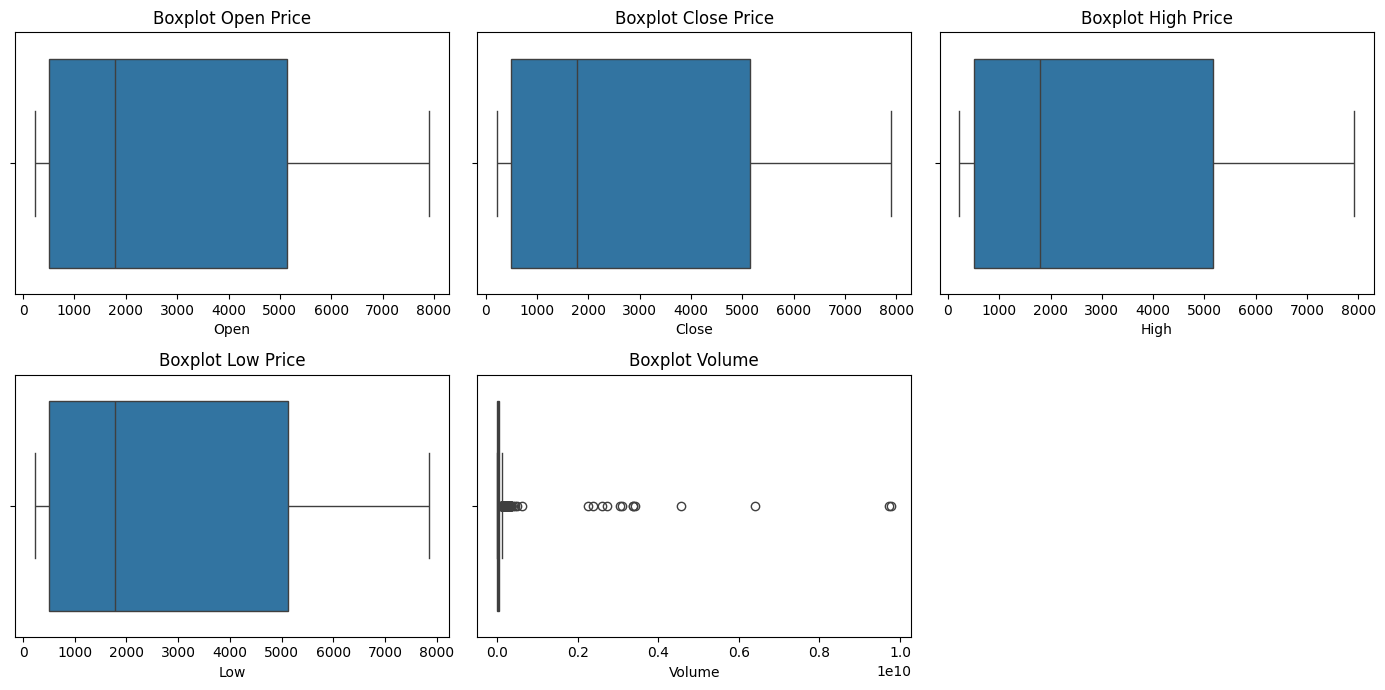

In [11]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 3, 1)
sns.boxplot(x=maindf['Open'])
plt.title('Boxplot Open Price')

plt.subplot(2, 3, 2)
sns.boxplot(x=maindf['Close'])
plt.title('Boxplot Close Price')

plt.subplot(2, 3, 3)
sns.boxplot(x=maindf['High'])
plt.title('Boxplot High Price')

plt.subplot(2, 3, 4)
sns.boxplot(x=maindf['Low'])
plt.title('Boxplot Low Price')

plt.subplot(2, 3, 5)
sns.boxplot(x=maindf['Volume'])
plt.title('Boxplot Volume')

plt.tight_layout()
plt.show()

Penjelasan:

Boxplot diatas hanya berfungsi untuk menampilkan apakah ada **OUTLIERS** pada data **TANPA PENGAMBILAN KEPUTUSAN APAPUN** dengan menggunakan library seaborn dan matplotlib, untuk data cleansing akan dilakukan pada tahapan **DATA PREPARATION**. Outlier sendiri adalah observasi yang terletak pada jarak abnormal dari nilai lain dalam sampel acak dari suatu populasi dalam data.

Dapat dilihat pada boxplot diatas bahwa hanya pada **feature volume terjadinya peristiwa outliers** sedangkan pada feature lain aman tanpa terjadinya outliers.



## 9. Distribusi Feature Harga menggunakan Histogram

Berikut adalah Univariate Analysis - Histograms untuk memeriksa distribusi data pada feature harga (Open, High, Low, Close, Volume):

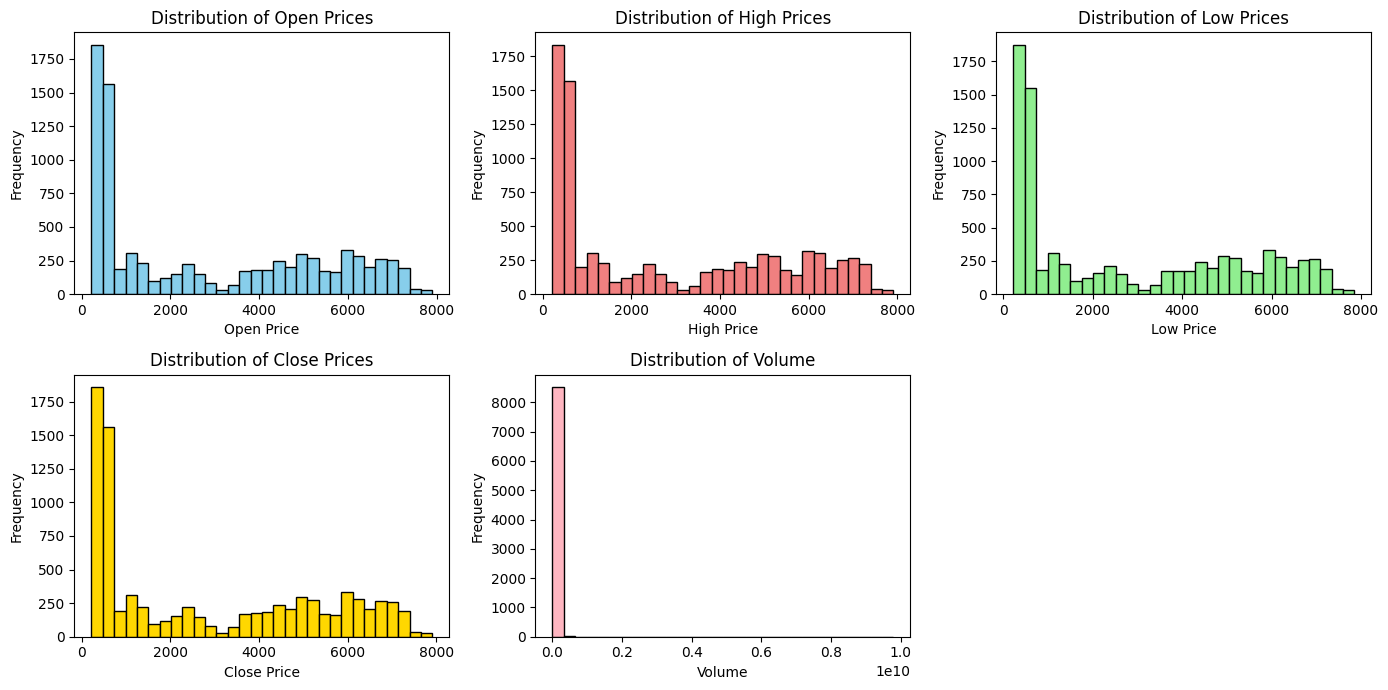

In [12]:
plt.figure(figsize=(14, 7))

# Histogram 'Open'
plt.subplot(2, 3, 1)
plt.hist(maindf['Open'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Open Prices')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

# Histogram 'High'
plt.subplot(2, 3, 2)
plt.hist(maindf['High'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of High Prices')
plt.xlabel('High Price')
plt.ylabel('Frequency')

# Histogram 'Low'
plt.subplot(2, 3, 3)
plt.hist(maindf['Low'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Low Prices')
plt.xlabel('Low Price')
plt.ylabel('Frequency')

# Histogram 'Close'
plt.subplot(2, 3, 4)
plt.hist(maindf['Close'], bins=30, color='gold', edgecolor='black')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Histogram 'Volume'
plt.subplot(2, 3, 5)
plt.hist(maindf['Volume'], bins=30, color='lightpink', edgecolor='black')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Penjelasan:

Grafik distribusi diatas dibuat menggunakan library matplotlib.

Terlihat pada gambar diatas bahwa distribusi data pada keseluruhan(5) Feature terdapat perbedaan. Untuk feature open, high, low, close memiliki rentang nilai yang sama sedangkan volume memiliki nilai distribusi yang berbeda sendiri (menandakan outlier seperti yang sudah dijelaskan pada step sebelumnya).


## 10. Visualisasi Distribusi Harga menggunakan Density Plot

Berikut adalah Univariate Analysis - Density Plots untuk memeriksa distribusi data pada feature harga (Open, High, Low, Close, Volume):

<ipython-input-13-da814e7f9a6a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maindf['Open'], shade=True, color='skyblue')
<ipython-input-13-da814e7f9a6a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maindf['High'], shade=True, color='lightcoral')
<ipython-input-13-da814e7f9a6a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maindf['Low'], shade=True, color='lightgreen')
<ipython-input-13-da814e7f9a6a>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maindf['Close'], shade=True, color='go

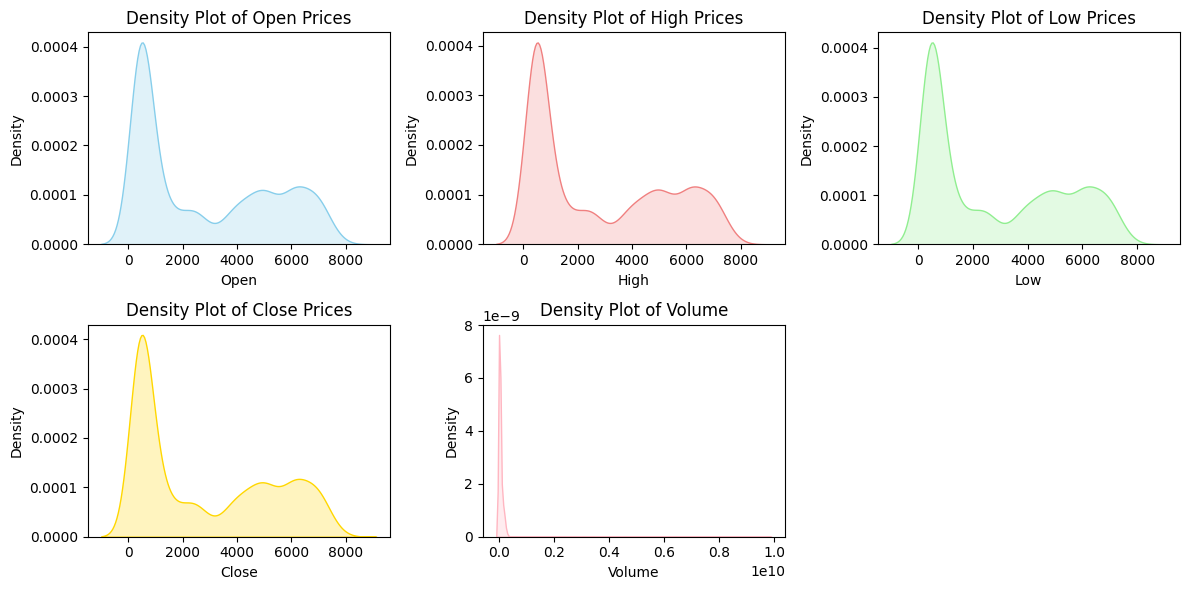

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.kdeplot(maindf['Open'], shade=True, color='skyblue')
plt.title('Density Plot of Open Prices')

plt.subplot(2, 3, 2)
sns.kdeplot(maindf['High'], shade=True, color='lightcoral')
plt.title('Density Plot of High Prices')

plt.subplot(2, 3, 3)
sns.kdeplot(maindf['Low'], shade=True, color='lightgreen')
plt.title('Density Plot of Low Prices')

plt.subplot(2, 3, 4)
sns.kdeplot(maindf['Close'], shade=True, color='gold')
plt.title('Density Plot of Close Prices')

plt.subplot(2, 3, 5)
sns.kdeplot(maindf['Volume'], shade=True, color='lightpink')
plt.title('Density Plot of Volume')

plt.tight_layout()
plt.show()

Penjelasan:

Density plot diatas dibuat menggunakan library matplotlib dan seaborn.

Sama seperti pada histogram, terlihat pada gambar diatas bahwa density data pada keseluruhan(5) Feature terdapat perbedaan. Untuk open, high, low, close memiliki rentang nilai yang sama sedangkan volume memiliki nilai pola density yang berbeda sendiri.

## 11. Visualisasi Time Series pada Close Price

Visualisasikan Close Price Time Series:

<ipython-input-14-c77c2453b337>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = maindf['Close'].resample('M').mean()


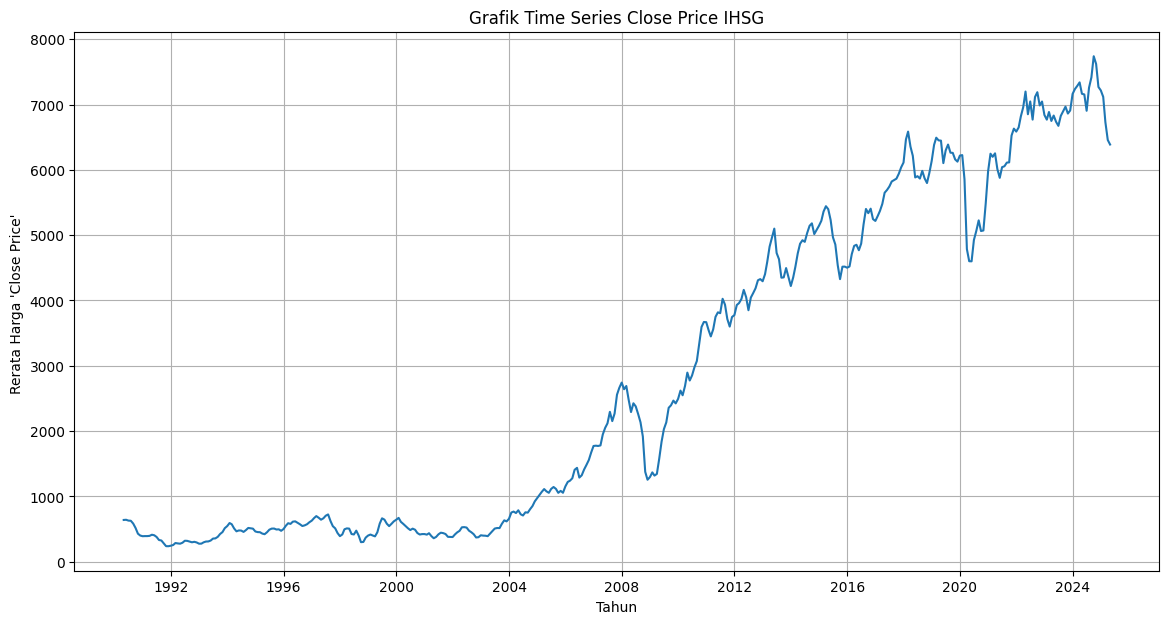

In [14]:
maindf['date'] = pd.to_datetime(maindf['date'])
maindf = maindf.set_index('date')
monthly_data = maindf['Close'].resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data.values)
plt.xlabel("Tahun")
plt.ylabel("Rerata Harga 'Close Price' ")
plt.title("Grafik Time Series Close Price IHSG")
plt.grid(True)
plt.show()

Penjelasan:


Gambar diatas adalah bentuk pola time series dari dataset IHSG sejak 1990 hingga hari ini, dapat dilihat juga pola serta fluktiasinya yang cukup tinggi.

## 12. Correlation Matrix dan Scatter Plots

Melakukan Correlation Matrix untuk mengetahui "multivariate analysis" data:

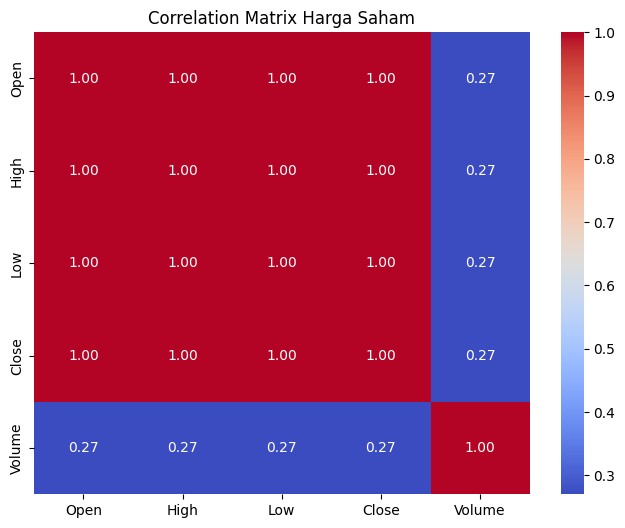

In [15]:
correlation_matrix = maindf[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Harga Saham')
plt.show()

Penjelasan:

Kode diatas bertujuan untuk **menganalisis hubungan linear (korelasi)** antara variabel-variabel numerik dalam dataset harga saham (`maindf`) dan memvisualisasikannya dalam bentuk **heatmap**. Pertama, kode memilih kolom-kolom numerik (`Open`, `High`, `Low`, `Close`, `Volume`) dan menghitung matriks korelasi menggunakan metode Pearson dengan `.corr()`, yang menghasilkan nilai antara -1 (korelasi negatif sempurna) hingga +1 (korelasi positif sempurna). Selanjutnya, menggunakan library `seaborn`, kode membuat visualisasi heatmap dengan warna gradien `coolwarm` (biru untuk korelasi negatif, merah untuk positif), menampilkan nilai korelasi hingga 2 desimal di setiap sel (`annot=True`, `fmt=".2f"`), dan mengatur ukuran plot menjadi 8x6 inci.


Pada Correlation Matrix diatas terlihat sangat amat jelas bahwa Hasilnya memperlihatkan seberapa kuat hubungan antara pasangan variabel, harga `Open`, `High`, `Low`,dan `Close` berkorelasi sangat positif (nilai 1 sempurna), sementara `Volume` perdagangan menunjukkan korelasi lemah dengan harga (nilai mendekati 0 yaitu 0.27). Hal ini membuktikan bahwa korelasi antara feature volume dengan feature lainnya berbeda sehingga dapat di buang (**DROP**) di proses-proses selanjutnya.

Menampilkan Scatter Plots

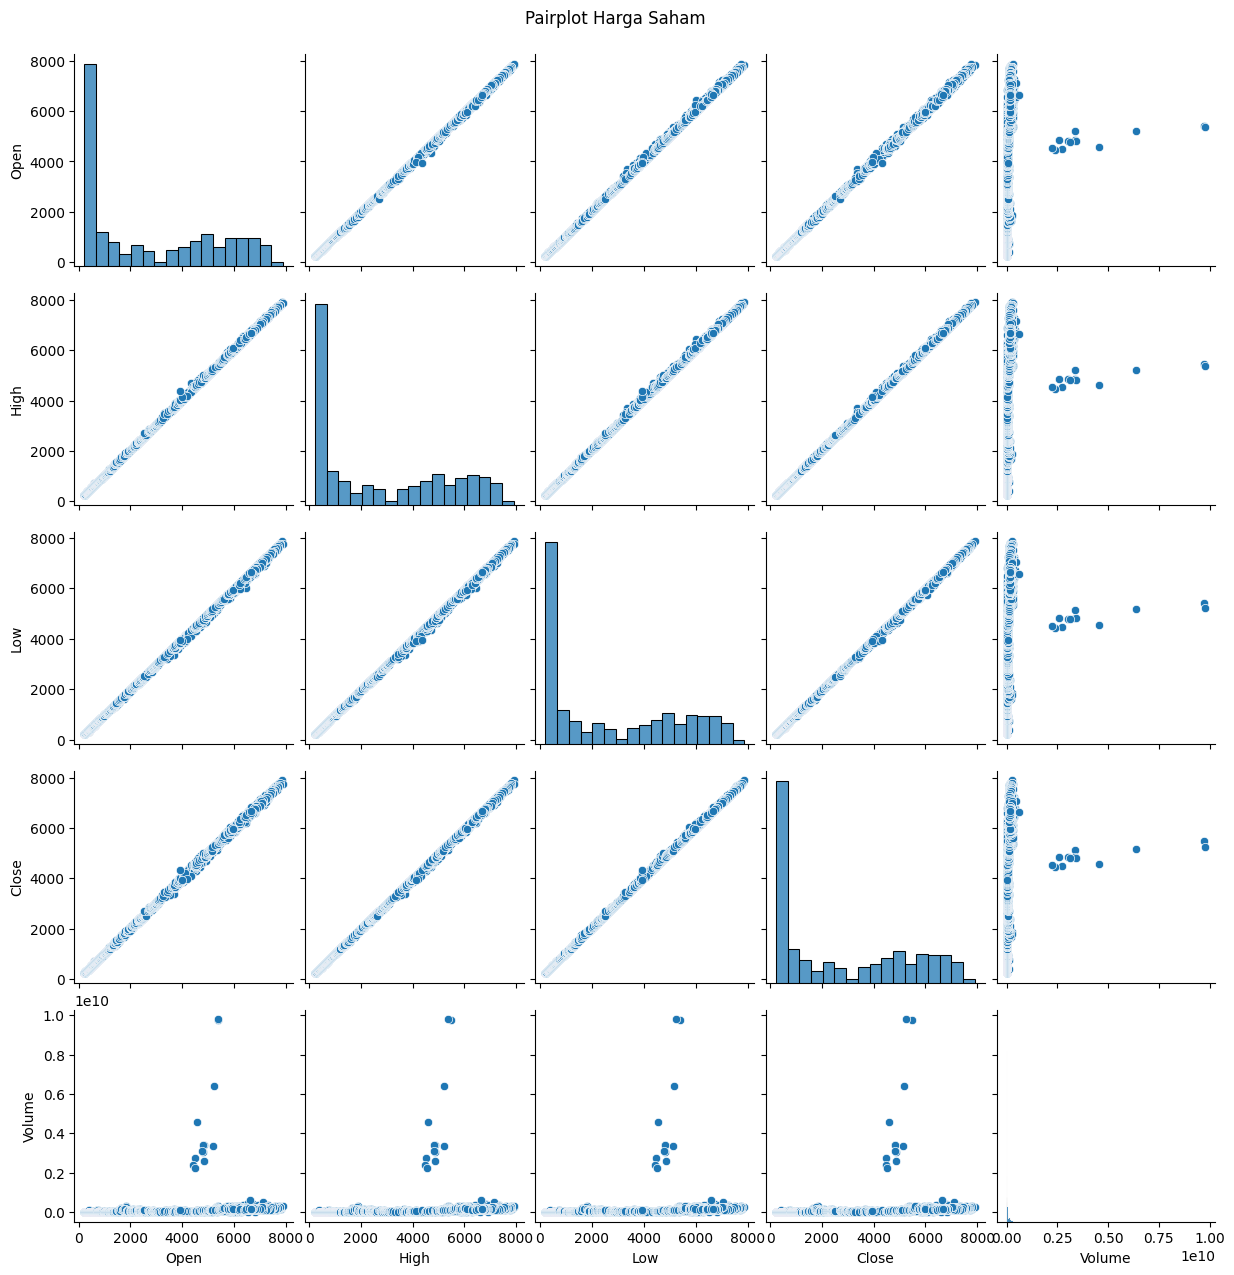

In [16]:
sns.pairplot(maindf[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pairplot Harga Saham', y=1.02)
plt.show()

Penjelasan:

Kode di atas menggunakan fungsi **`sns.pairplot()`** dari library Seaborn untuk membuat visualisasi **pairplot** dari dataset harga saham (`maindf`). Berikut penjelasan lengkapnya:

kode diatas mengambil kolom numerik pada feature (`Open`, `High`, `Low`, `Close`, `Volume`) dari DataFrame `maindf` dan menghasilkan **matriks scatter plot** yang menampilkan hubungan antara setiap pasangan variabel secara sekaligus. Pada diagonal utama, ditampilkan **histogram** yang menunjukkan distribusi masing-masing variabel, sedangkan di luar diagonal adalah **scatter plot** yang menggambarkan korelasi antara dua variabel. Judul plot (`Pairplot of Stock Prices`) ditambahkan dengan `plt.suptitle()` dan diposisikan sedikit di atas (`y=1.02`) untuk menghindari tumpang tindih dengan visualisasi. Pairplot sangat berguna untuk **analisis eksplorasi data (EDA)** karena memungkinkan identifikasi pola, korelasi, outlier, atau distribusi data secara visual dalam satu tampungan. Misalnya, kita bisa langsung melihat apakah `High` dan `Low` memiliki hubungan linear yang kuat atau apakah `Volume` memiliki pola tertentu terhadap harga penutupan (`Close`). Fungsi `plt.show()` digunakan untuk menampilkan grafik yang dihasilkan.

Dapat dilihat pada scater plot diatas bahwa hanya volume yang datanya memiliki ketimpangan korelasi dengan feature lainnya (data tidak linear), sedangkan keempat feature lainnya memiliki korelasi yang hampir sama (menunjukkan garis linear).

Kesimpulan:
1. **Karena Volume tidak memiliki korelasi yang kuat dengan data lainnya maka tidak dipilih**. (DROP)
2. **Close yang akan dipilih karena dari keempat parameter lainnya hasilnya hampir sama**.

# C. Data Preparation

## 1. Menangani Missing Value, Outlier, dan Duplikat

Mengatasi Missing Value:

In [17]:
def handle_missing_values(df):
    print("\n=== Penanganan Missing Values ===")

    # Cek jumlah missing values
    print("\nMissing Values Sebelum Penanganan:")
    print(df.isnull().sum())

    # Handle missing values
    if df.isnull().sum().any():
        # Untuk data time series, gunakan interpolasi (https://medium.com/@aseafaldean/time-series-data-interpolation-e4296664b86)
        df_clean = df.interpolate(method='linear')
        print("\nMissing values diatasi dengan interpolasi linear")

        #Jika masih ada missing value setelah interpolasi
        if df_clean.isnull().sum().any():
          df_clean = df_clean.ffill().bfill()
          print("\nSisa Missing values diatasi dengan forward-fill dan back-fill")
    else:
        df_clean = df.copy()
        print("\nTidak ada missing values")

    # Verifikasi setelah penanganan
    print("\nMissing Values Setelah Penanganan:")
    print(df_clean.isnull().sum())

    return df_clean

# Contoh penggunaan
maindf_cleaned = handle_missing_values(maindf)


=== Penanganan Missing Values ===

Missing Values Sebelum Penanganan:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Tidak ada missing values

Missing Values Setelah Penanganan:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


Penjelasan:

Fungsi handle_missing_values(df) dirancang untuk mengidentifikasi dan menangani missing values (data hilang) dalam DataFrame secara sistematis, khususnya untuk data time series seperti harga saham. Pertama, fungsi ini menampilkan jumlah missing values per kolom untuk memberikan gambaran awal. Jika ditemukan missing values, fungsi akan melakukan interpolasi linear terlebih dahulu karena metode ini cocok untuk data time series dengan mengisi nilai yang hilang berdasarkan pola data sekitarnya.

Jika masih ada missing values setelah interpolasi (misalnya di awal atau akhir dataset), fungsi akan menggunakan kombinasi forward-fill (mengisi dengan nilai terakhir yang valid) dan back-fill (mengisi dengan nilai berikutnya yang valid) sebagai cadangan. Fungsi ini juga memberikan laporan sebelum dan setelah penanganan untuk memastikan semua missing values telah teratasi, dan mengembalikan DataFrame yang sudah bersih (df_clean). Pendekatan bertahap ini memastikan kelengkapan data sambil mempertahankan karakteristik time series, yang penting untuk analisis finansial.

Melakukan proses IQR untuk mengatasi outlier:




In [18]:
def handle_outliers(df, column):
    print(f"\n=== Penanganan Outliers pada kolom '{column}' ===")

    # Metode IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Jumlah outliers: {len(outliers)}")

    # Winsorizing (Batas atas/bawah diganti dengan batas IQR) https://www.stat.cmu.edu/~hseltman/309/Book/Book.pdf halaman 70
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    print("Outliers ditangani dengan Winsorizing")

    return df

# Contoh penggunaan untuk beberapa kolom (sesuaikan dengan kolom yang ingin diproses)
columns_to_check = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in columns_to_check:
    maindf_cleaned = handle_outliers(maindf_cleaned, col)


=== Penanganan Outliers pada kolom 'Open' ===
Jumlah outliers: 0
Outliers ditangani dengan Winsorizing

=== Penanganan Outliers pada kolom 'High' ===
Jumlah outliers: 0
Outliers ditangani dengan Winsorizing

=== Penanganan Outliers pada kolom 'Low' ===
Jumlah outliers: 0
Outliers ditangani dengan Winsorizing

=== Penanganan Outliers pada kolom 'Close' ===
Jumlah outliers: 0
Outliers ditangani dengan Winsorizing

=== Penanganan Outliers pada kolom 'Volume' ===
Jumlah outliers: 1026
Outliers ditangani dengan Winsorizing


Penjelasan:

Fungsi **handle_outliers(df, column)** dirancang untuk mendeteksi dan menangani outliers pada kolom tertentu dalam DataFrame menggunakan metode IQR (Interquartile Range), di mana pertama-tama dihitung kuartil bawah (Q1) dan kuartil atas (Q3) untuk menentukan batas bawah (lower_bound = Q1 - 1.5 * IQR) dan batas atas (upper_bound = Q3 + 1.5 * IQR), kemudian mengidentifikasi outliers sebagai nilai yang berada di luar rentang ini. Setelah menampilkan jumlah outliers yang ditemukan, fungsi ini menerapkan teknik winsorizing dengan mengganti nilai outliers yang terdeteksi menggunakan metode clip() untuk membatasi nilai-nilai ekstrem tersebut agar tidak melebihi batas IQR yang telah ditentukan, sehingga distribusi data menjadi lebih stabil tanpa menghilangkan seluruh baris yang mengandung outliers. Contoh penggunaan fungsi ini dilakukan secara iteratif pada kolom-kolom penting seperti 'Open', 'High', 'Low', 'Close', dan 'Volume' dari DataFrame maindf_cleaned yang sebelumnya telah dibersihkan dari missing values, sehingga menghasilkan data yang lebih konsisten dan siap untuk analisis lebih lanjut seperti pemodelan statistik atau visualisasi tanpa distorsi oleh nilai-nilai ekstrem. Outliers ditemukan pada Feature volume dan segera dibersihkan.

Menghapus data duplikat:

In [19]:
def remove_duplicates_by_date(df):
    print("\n=== Penanganan Data Duplikat Berdasarkan 'date' ===")

    # Cek jumlah duplikat berdasarkan 'date'
    duplicate_dates = df[df.index.duplicated(keep=False)]
    print(f"\nJumlah baris duplikat berdasarkan 'date' sebelum dihapus: {len(duplicate_dates)}")

    # Hapus duplikat berdasarkan 'date', pertahankan entri pertama
    df_no_duplicates = df[~df.index.duplicated(keep='first')]

    # Verifikasi setelah penghapusan
    duplicate_dates_after = df_no_duplicates[df_no_duplicates.index.duplicated(keep=False)]
    print(f"\nJumlah baris duplikat berdasarkan 'date' setelah dihapus: {len(duplicate_dates_after)}")

    return df_no_duplicates

maindf_cleaned = remove_duplicates_by_date(maindf_cleaned)


=== Penanganan Data Duplikat Berdasarkan 'date' ===

Jumlah baris duplikat berdasarkan 'date' sebelum dihapus: 0

Jumlah baris duplikat berdasarkan 'date' setelah dihapus: 0


Penjelasan:


Fungsi `remove_duplicates_by_date` menerima parameter DataFrame (`df`) dan melakukan tiga langkah utama: (1) Mengecek jumlah baris duplikat dengan `df[df.index.duplicated(keep=False)]` yang mengidentifikasi semua baris dengan tanggal duplikat, (2) Menghapus duplikat tersebut dengan mempertahankan entri pertama menggunakan `df[~df.index.duplicated(keep='first')]`, dan (3) Memverifikasi hasil penghapusan dengan mengecek kembali duplikat. Dalam contoh output, kedua pengecekan menunjukkan 0 duplikat, artinya data sudah bersih sejak awal. Fungsi ini mengembalikan DataFrame tanpa duplikat (`df_no_duplicates`) dan mencetak laporan jumlah duplikat sebelum/sesudah pemrosesan untuk transparansi.


Output kosong (0 duplikat) mengindikasikan tidak ada tindakan penghapusan yang diperlukan, tetapi fungsi tetap berguna sebagai langkah preventif dalam pipeline pembersihan data.

## 2. Encoding data dan pilih Feature Date dan Close

Memilih feature `date` dan `Close`:

In [20]:
close_stock = maindf_cleaned.copy()

selected_data = maindf_cleaned.reset_index()[['date', 'Close']]
selected_data

,date,Close
0,1990-04-06,641.244019
1,1990-04-09,633.457336
2,1990-04-10,632.061340
3,1990-04-11,634.668274
4,1990-04-12,639.589111
...,...,...
8534,2025-04-21,6445.966797
8535,2025-04-22,6538.266113
8536,2025-04-23,6634.376953
8537,2025-04-24,6613.478027


Penjelasan:

Kode tersebut membuat salinan dari DataFrame `maindf_cleaned` ke dalam variabel `close_stock` menggunakan `.copy()`, sehingga perubahan di `close_stock` tidak memengaruhi data asli. Lalu, `maindf_cleaned` di-*reset* indeksnya menjadi angka berurutan dengan `reset_index()`, dan dari hasil itu hanya kolom `date` dan `Close` yang dipilih menggunakan `[['date', 'Close']]`. Hasil akhirnya adalah DataFrame baru bernama `selected_data` berisi 8540 baris data harga penutupan saham (`Close`) beserta tanggalnya (`date`) dengan indeks integer.

Berdasarkan proses EDA, feature yang akan dipilih dan dijadikan untuk testing serta training adalah feature close. Kemudian kelima data awal dan akhir dari feature date dan close akan ditampilkan seperti pada tabel diatas.

**ANDA BISA MEMBACA LAGI PADA TAHAPAN "Correlation Matrix dan Scatter Plots - Multivariate Analysis" KENAPA FEATURE CLOSE YANG DIPILIH**

kemudian pilih 1000 data terbaru untuk data test dan data train:

In [21]:
maindf_cleaned_split = selected_data[-1000:]
maindf_cleaned_split

,date,Close
7539,2021-03-02,6359.205078
7540,2021-03-03,6376.756836
7541,2021-03-04,6290.798828
7542,2021-03-05,6258.749023
7543,2021-03-08,6248.464844
...,...,...
8534,2025-04-21,6445.966797
8535,2025-04-22,6538.266113
8536,2025-04-23,6634.376953
8537,2025-04-24,6613.478027


Penjelasan:

Kode berikut melakukan slicing untuk mengambil 1000 baris terakhir dari `selected_data`. Tanda `-1000:` berarti mengambil data mulai dari baris ke-1000 dari belakang hingga baris terakhir. Karena `selected_data` berisi 8540 baris, maka `selected_data[-1000:]` mengambil baris ke-7539 sampai 8538. Hasilnya disimpan ke dalam `maindf_cleaned_split`, yang tetap memiliki dua kolom yaitu `date` dan `Close`. Dengan begitu, data pada `maindf_cleaned_split` berisi data harga penutupan saham (Close) dan tanggal (date) dari 2 Maret 2021 hingga 25 April 2025 (dimana data ini di scrapping).

Kenapa hanya 1000 data terbaru yang dipilih untuk training dan testing??

Saya hanya memilih 1000 data terbaru agar kinerja model tetap optimal dan tidak terbebani, karena beberapa model yang saya gunakan tidak mampu membaca data time series yang sangat panjang.

## 3. Bagi data kedalam data train (80%) dan data test (20%)

In [22]:
from sklearn.model_selection import train_test_split

# Select features (Close only)
selected_data = maindf_cleaned_split[['Close']]

# Split data ke training and testing sets (80:20)
train_data, test_data = train_test_split(selected_data, test_size=0.2, random_state=42, shuffle=False)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (800, 1)
Testing data shape: (200, 1)


Penjelasan:

Baris kode diatas adalah proses untuk melakukan persiapan data time series dengan memilih hanya kolom `Close` (harga penutupan) sebagai fitur, kemudian membagi data menjadi training set (80%) dan testing set (20%) menggunakan `train_test_split` dari `scikit-learn`. Parameter ``shuffle=False`` sangat penting karena menjaga urutan kronologis data, mencegah kebocoran informasi dari masa depan ke masa lalu, yang dapat merusak evaluasi model time series.
`random_state=42` memastikan hasil yang konsisten, output akhir menampilkan dimensi dari training dan testing set untuk memverifikasi proporsi pembagian data.

penggunaan konsep data pelatihan dan data pengujian menggunakan materi yang ada pada buku yang dikarang oleh [(Triayudi)](https://anyflip.com/tdezn/iggg/basic/151-200) pada halaman 153-155.

## 4. Standarisasi menggunakan metode Min-Max Scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both training and testing data
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# You can convert them back to dataframes if needed:
train_data_scaled = pd.DataFrame(train_data_scaled, columns=['Close'], index=train_data.index)
test_data_scaled = pd.DataFrame(test_data_scaled, columns=['Close'], index=test_data.index)

print("Scaled Training data shape:", train_data_scaled.shape)
print("Scaled Testing data shape:", test_data_scaled.shape)

Scaled Training data shape: (800, 1)
Scaled Testing data shape: (200, 1)


Penjelasan:

Proses diatas merupakan proses normalisasi data time series menggunakan **MinMaxScaler** dari **scikit-learn** untuk mengubah nilai fitur 'Close' ke dalam rentang [0, 1], di mana scaler pertama-tama di-fit hanya pada data training (fit_transform) untuk menghindari kebocoran data, kemudian diaplikasikan ke data testing (transform) menggunakan parameter yang sama, sebelum akhirnya dikonversi kembali ke DataFrame dengan indeks asli untuk mempertahankan struktur temporal. Normalisasi ini penting untuk meningkatkan performa model machine learning, terutama yang berbasis gradient descent atau neural networks, dengan memastikan semua fitur berada pada skala yang seragam, sementara pemisahan yang ketat antara proses fitting (hanya pada data training) dan transformasi (pada data testing) menjaga validasi evaluasi model tetap akurat. Outputnya menunjukkan dimensi data yang telah dinormalisasi sesuai dengan pembagian sebelumnya.

Menampilkan **BUKTI** 5 data terbaru dan 5 data terlama dari data train yang sudah di normalisasi **TANPA BERMAKSUD** untuk melakukan visualisasi data, menampilkan data, dan eksplorasi pemahamaan data lainya seperti pada catatan review:

In [24]:
train_data_scaled

,Close
7539,0.357871
7540,0.368363
7541,0.316976
7542,0.297815
7543,0.291667
...,...
8334,0.632939
8335,0.669201
8336,0.674694
8337,0.670831


Menampilkan **BUKTI** 5 data terbaru dan 5 data terlama dari data test yang sudah di normalisasi **TANPA BERMAKSUD** untuk melakukan visualisasi data, menampilkan data, dan eksplorasi pemahamaan data lainya seperti pada catatan review:

In [25]:
test_data_scaled

,Close
8339,0.721794
8340,0.778962
8341,0.824425
8342,0.815767
8343,0.858579
...,...
8534,0.409739
8535,0.464918
8536,0.522375
8537,0.509881


## 5. Membentuk ulang data untuk kesesuaian model

### LSTM

konversikan array nilai menjadi matriks kumpulan data

In [26]:
import numpy as np

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset['Close'][i:(i+time_step)].values
        dataX.append(a)
        # Use iloc to access data by position
        dataY.append(dataset['Close'].iloc[i + time_step])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train_lstm, y_train_lstm = create_dataset(train_data_scaled, time_step)
X_test_lstm, y_test_lstm = create_dataset(test_data_scaled, time_step)

X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0],X_train_lstm.shape[1] , 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0],X_test_lstm.shape[1] , 1)

print("X_train: ", X_train_lstm.shape)
print("X_test: ", X_test_lstm.shape)
print("y_train: ", y_train_lstm.shape)
print("y_test", y_test_lstm.shape)

X_train:  (789, 10, 1)
X_test:  (189, 10, 1)
y_train:  (789,)
y_test (189,)


Penjelasan:

Pada kode diatas fungsi create_dataset digunakan untuk mempersiapkan data time series dalam format yang sesuai untuk pemodelan LSTM dengan mengubah deretan data menjadi pasangan input-output berbasis sequence. Fungsi ini mengambil dataset (dengan kolom 'Close') dan parameter **time_step** (jumlah lag), lalu melalui looping, ia membuat input sequence (dataX) yang berisi sekuens nilai sepanjang **time_step** dan output/target (dataY) yang berisi nilai berikutnya setelah sequence tersebut. Hasilnya adalah dua array numpy: dataX (berisi kumpulan sequences untuk training) dan dataY (berisi nilai target yang sesuai), di mana struktur ini memungkinkan LSTM untuk mempelajari pola temporal karena LSTM memerlukan input 3D berupa [samples, time_steps, features]. Misalnya, jika time_step=3, maka untuk data [1, 2, 3, 4, 5], input pertamanya adalah [1, 2, 3] dan targetnya adalah 4 begitu pula jika time_step=10.

### CNN 1D

konversikan array nilai menjadi matriks kumpulan data

In [27]:
# Create the dataset for CNN
def create_dataset_cnn(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset['Close'][i:(i + time_step)].values
        dataX.append(a)
        dataY.append(dataset['Close'].iloc[i + time_step])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train_cnn, y_train_cnn = create_dataset_cnn(train_data_scaled, time_step)
X_test_cnn, y_test_cnn = create_dataset_cnn(test_data_scaled, time_step)

# Reshape input data CNN (samples, time steps, features)
X_train_cnn = X_train_cnn.reshape(X_train_cnn.shape[0], X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(X_test_cnn.shape[0], X_test_cnn.shape[1], 1)

Penjelasan:

Fungsi `create_dataset_cnn` menerima input dataset dan parameter `time_step` (default=1) untuk membuat struktur data berjendela/windowing, di mana setiap sampel input (`dataX`) terdiri dari sekumpulan nilai historis (sebanyak `time_step`) dan output/target (`dataY`) adalah nilai berikutnya yang akan diprediksi. Pada implementasi ini, `time_step=10` berarti model akan menggunakan 10 hari sebelumnya untuk memprediksi hari ke-11. Setelah pembuatan dataset, data di-reshape menjadi format 3D `[samples, time steps, features]` yang diperlukan oleh CNN 1D, di mana `samples` adalah jumlah observasi, `time steps=10` (sesuai parameter), dan `features=1` (karena hanya menggunakan 'Close'). Proses ini dilakukan baik untuk data training (`X_train_cnn`, `y_train_cnn`) maupun testing (`X_test_cnn`, `y_test_cnn`), dengan data yang telah dinormalisasi sebelumnya (`train_data_scaled`, `test_data_scaled`). Output akhirnya adalah array numpy yang siap digunakan sebagai input model CNN 1D.

### GRU

konversikan array nilai menjadi matriks kumpulan data

In [28]:
# Create the dataset for GRU
def create_dataset_gru(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset['Close'][i:(i + time_step)].values
        dataX.append(a)
        dataY.append(dataset['Close'].iloc[i + time_step])
    return np.array(dataX), np.array(dataY)

time_step = 10
X_train_gru, y_train_gru = create_dataset_gru(train_data_scaled, time_step)
X_test_gru, y_test_gru = create_dataset_gru(test_data_scaled, time_step)

# Reshape input data GRU (samples, time steps, features)
X_train_gru = X_train_gru.reshape(X_train_gru.shape[0],X_train_gru.shape[1] , 1)
X_test_gru = X_test_gru.reshape(X_test_gru.shape[0],X_test_gru.shape[1] , 1)

Penjelasan:

Kode tersebut mendefinisikan fungsi `create_dataset_gru` yang bertujuan mengubah dataset menjadi format input-output untuk model GRU, dengan membagi data menjadi input `dataX` berupa urutan nilai `Close` sepanjang `time_step`, dan target `dataY` berupa nilai `Close` setelah urutan tersebut. Fungsi ini kemudian digunakan untuk menghasilkan pasangan data latih (`X_train_gru`, `y_train_gru`) dan data uji (`X_test_gru`, `y_test_gru`) dari `train_data_scaled` dan `test_data_scaled` dengan `time_step` sebesar 10. Setelah itu, data input GRU di-*reshape* menjadi bentuk tiga dimensi (samples, time steps, features) agar sesuai dengan kebutuhan input layer GRU, dengan `features` diset 1 karena hanya menggunakan satu variabel, yaitu harga `Close`.


# D. Model Development

## 1. Long Short Term Memory (LSTM)

Tuning Hyperparameter serta menampilkan history saat pelatihan model:

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Tuning Hyperparameter
model_lstm =Sequential()
model_lstm.add(LSTM(100,input_shape=(None,1),activation="relu"))
model_lstm.add(Dense(1))
model_lstm.compile(loss="mean_squared_error",optimizer="adam")

history_lstm = model_lstm.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=128,batch_size=16,verbose=1)

Epoch 1/128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1449 - val_loss: 0.0123
Epoch 2/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 0.0073
Epoch 3/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0076
Epoch 4/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - val_loss: 0.0073
Epoch 5/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - val_loss: 0.0065
Epoch 6/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - val_loss: 0.0061
Epoch 7/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 8/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 0.0052
Epoch 9/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - val_loss: 0.0052
Epoch 10/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - val_loss: 0.0054
Epoch 11/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 0.0048
Epoch 12/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_l

Penjelasan:

Kode tersebut membangun dan melatih model LSTM menggunakan Keras untuk melakukan prediksi regresi (harga penutupan IHSG). Model dibuat secara berurutan (Sequential) dengan satu layer LSTM berisi 100 neuron dan fungsi aktivasi ReLU, yang menerima input berupa urutan data berdimensi satu. Setelah itu, ditambahkan layer Dense dengan satu neuron sebagai output. Model dikompilasi menggunakan loss function mean squared error karena targetnya adalah nilai kontinu, serta menggunakan optimizer Adam yang populer dan efisien. Pelatihan dilakukan dengan data latih dan validasi selama 128 epoch dengan batch size 16, dan proses pelatihannya akan ditampilkan secara rinci karena verbose=1.


Lakukan prediksi dan periksa Performence metrics:

In [30]:
train_predict_lstm=model_lstm.predict(X_train_lstm)
test_predict_lstm=model_lstm.predict(X_test_lstm)
train_predict_lstm.shape, test_predict_lstm.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


((789, 1), (189, 1))

Penjelasan:

Kode tersebut digunakan untuk melakukan prediksi menggunakan model LSTM yang telah dilatih. Baris pertama menghasilkan prediksi terhadap data latih (X_train_lstm) dan menyimpannya ke dalam variabel train_predict_lstm, sedangkan baris kedua menghasilkan prediksi terhadap data uji (X_test_lstm) dan menyimpannya ke dalam test_predict_lstm. Kedua variabel tersebut berisi hasil prediksi model dalam bentuk array berdimensi dua, di mana setiap baris mewakili satu prediksi nilai output. Baris terakhir menampilkan bentuk (shape) dari hasil prediksi untuk data latih dan data uji, yang biasanya berbentuk (jumlah_data, 1) karena model hanya menghasilkan satu nilai output untuk setiap input sequence.

Ubah kembali ke bentuk Original (Denormalisasi):

In [31]:
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
original_ytrain_lstm = scaler.inverse_transform(y_train_lstm.reshape(-1,1))
original_ytest_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1,1))

Penjelasan:

Kode tersebut digunakan untuk mengembalikan data hasil prediksi dan data asli ke skala aslinya sebelum dilakukan normalisasi (proses inverse transform). Karena data input sebelumnya telah dinormalisasi menggunakan scaler (MinMaxScaler), hasil prediksi dari model (train_predict_lstm dan test_predict_lstm) masih dalam bentuk nilai yang telah diskalakan. Oleh karena itu, scaler.inverse_transform() digunakan untuk mengubah hasil prediksi dan juga nilai target asli (y_train_lstm dan y_test_lstm) kembali ke skala harga sebenarnya. Proses reshape pada y_train_lstm dan y_test_lstm dilakukan agar bentuk array sesuai dengan format yang dibutuhkan oleh inverse_transform, yaitu dua dimensi (n_samples, 1). Hal ini penting agar evaluasi performa model bisa dilakukan secara akurat menggunakan nilai harga yang sesungguhnya.

## 2. CNN 1D

Tuning Hyperparameter model:

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

#Tuning Hyperparameter
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,157 (51.39 KB)

 Trainable params: 13,157 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

Penjelasan:

Model CNN terdiri dari lapisan Conv1D dengan 64 filter dan kernel size 3 untuk mengekstrak pola lokal dalam data, diikuti MaxPooling1D untuk reduksi dimensi, Flatten untuk mengubah output menjadi vektor, serta dua lapisan Dense (50 neuron dengan aktivasi ReLU dan 1 neuron output tanpa aktivasi untuk regresi) yang dikompilasi dengan optimizer Adam dan loss function MSE (Mean Squared Error). Arsitektur ini dirancang untuk menangkap pola spasial/temporal dalam data deret waktu dengan menganggap sequence sebagai "feature map" 1D yang dapat diproses oleh operasi konvolusi.

Menampilkan history saat pelatihan:

In [33]:
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=128, batch_size=32, validation_data=(X_test_cnn, y_test_cnn), verbose=1)

Epoch 1/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1754 - val_loss: 0.0153
Epoch 2/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - val_loss: 0.0091
Epoch 3/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0082
Epoch 4/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0079
Epoch 5/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - val_loss: 0.0068
Epoch 6/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0065
Epoch 7/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0058
Epoch 8/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0056
Epoch 9/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 0.0051
Epoch 10/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 11/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0047
Epoch 12/128
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

Penjelasan:

Kode tersebut digunakan untuk melatih model CNN (model_cnn) menggunakan data latih (X_train_cnn, y_train_cnn) selama 128 epoch dengan batch size 32. Proses pelatihan ini juga memantau kinerja model terhadap data uji (X_test_cnn, y_test_cnn) sebagai data validasi untuk melihat apakah model mengalami overfitting atau tidak selama pelatihan. Parameter verbose=1 digunakan agar proses pelatihan ditampilkan secara rinci di konsol, termasuk nilai loss dan val_loss di setiap epoch. Hasil pelatihan disimpan dalam variabel history_cnn, yang dapat digunakan untuk memvisualisasikan atau menganalisis performa model dari waktu ke waktu.

Melakukan prediksi dan periksa Performence metrics:

In [34]:
train_predict_cnn=model_cnn.predict(X_train_cnn)
test_predict_cnn=model_cnn.predict(X_test_cnn)
train_predict_cnn.shape, test_predict_cnn.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


((789, 1), (189, 1))

Penjelasan:

Kode tersebut digunakan untuk melakukan prediksi menggunakan model cnn yang telah dilatih. Baris pertama menghasilkan prediksi terhadap data latih (X_train_cnn) dan menyimpannya ke dalam variabel train_predict_cnn, sedangkan baris kedua menghasilkan prediksi terhadap data uji (X_test_cnn) dan menyimpannya ke dalam test_predict_cnn. Kedua variabel tersebut berisi hasil prediksi model dalam bentuk array berdimensi dua, di mana setiap baris mewakili satu prediksi nilai output. Baris terakhir menampilkan bentuk (shape) dari hasil prediksi untuk data latih dan data uji, yang biasanya berbentuk (jumlah_data, 1) karena model hanya menghasilkan satu nilai output untuk setiap input sequence.

Ubah kembali ke bentuk Original (Denormalisasi):

In [35]:
train_predict_cnn = scaler.inverse_transform(train_predict_cnn)
test_predict_cnn = scaler.inverse_transform(test_predict_cnn)
original_ytrain_cnn = scaler.inverse_transform(y_train_cnn.reshape(-1,1))
original_ytest_cnn = scaler.inverse_transform(y_test_cnn.reshape(-1,1))

Penjelasan:

Kode tersebut digunakan untuk mengembalikan data hasil prediksi dan data asli ke skala aslinya sebelum dilakukan normalisasi (proses inverse transform). Karena data input sebelumnya telah dinormalisasi menggunakan scaler (MinMaxScaler), hasil prediksi dari model (train_predict_cnn dan test_predict_cnn) masih dalam bentuk nilai yang telah diskalakan. Oleh karena itu, scaler.inverse_transform() digunakan untuk mengubah hasil prediksi dan juga nilai target asli (y_train_cnn dan y_test_cnn) kembali ke skala harga sebenarnya. Proses reshape pada y_train_cnn dan y_test_cnn dilakukan agar bentuk array sesuai dengan format yang dibutuhkan oleh inverse_transform, yaitu dua dimensi (n_samples, 1). Hal ini penting agar evaluasi performa model bisa dilakukan secara akurat menggunakan nilai harga yang sesungguhnya.

## 3. GRU

Tuning Hyperparameter serta menampilkan history saat pelatihan model:

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Tuning Hyperparameter
model_gru = Sequential()
model_gru.add(GRU(100, input_shape=(X_train_gru.shape[1], 1), activation='relu')) # Adjust units as needed
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mse')

history_gru = model_gru.fit(X_train_gru, y_train_gru, epochs=128, batch_size=16, validation_data=(X_test_gru,y_test_gru), verbose=1)

Epoch 1/128


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.2128 - val_loss: 0.0219
Epoch 2/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - val_loss: 0.0043
Epoch 3/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 0.0044
Epoch 4/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 5/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0040
Epoch 6/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0041
Epoch 7/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 8/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 9/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0038
Epoch 10/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 0.0042
Epoch 11/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_loss: 0.0039
Epoch 12/128
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - val_l

Penjelasan:

Model GRU dibangun secara berurutan (`Sequential`) dengan satu layer GRU berisi 100 unit dan fungsi aktivasi ReLU, serta satu layer output Dense dengan satu neuron. Model dikompilasi menggunakan optimizer Adam dan loss function mean squared error (MSE), yang umum digunakan untuk masalah regresi. Pelatihan dilakukan selama 128 epoch dengan batch size 16 dan memantau performa pada data uji, sementara hasil pelatihan disimpan dalam `history_gru` untuk dianalisis lebih lanjut.

Melakukan prediksi dan Denormalisasi:

In [37]:
# Prediksi
train_predict_gru = model_gru.predict(X_train_gru)
test_predict_gru = model_gru.predict(X_test_gru)

# Denormalisasi
train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)
original_ytrain_gru = scaler.inverse_transform(y_train_gru.reshape(-1,1))
original_ytest_gru = scaler.inverse_transform(y_test_gru.reshape(-1,1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Penjelasan:

Kode tersebut digunakan untuk menghasilkan prediksi harga dari model GRU yang telah dilatih, serta mengembalikan nilai prediksi dan nilai aktual ke skala aslinya. Pertama, model melakukan prediksi terhadap data latih (`X_train_gru`) dan data uji (`X_test_gru`), lalu hasil prediksi tersebut disimpan dalam `train_predict_gru` dan `test_predict_gru`. Karena data sebelumnya telah dinormalisasi menggunakan `scaler` (MinMaxScaler), maka fungsi `inverse_transform()` digunakan untuk mengubah hasil prediksi serta data target asli (`y_train_gru` dan `y_test_gru`) kembali ke bentuk harga sebenarnya. Reshape dilakukan pada `y_train_gru` dan `y_test_gru` agar sesuai dengan format dua dimensi yang dibutuhkan oleh `inverse_transform`, sehingga hasil evaluasi dan visualisasi dapat mencerminkan nilai riil dari harga penutupan saham.

# E. Evaluasi Model

## 1. Evaluasi Model LSTM

Menampilkan Plotting Loss dan Validasi Loss model LSTM:

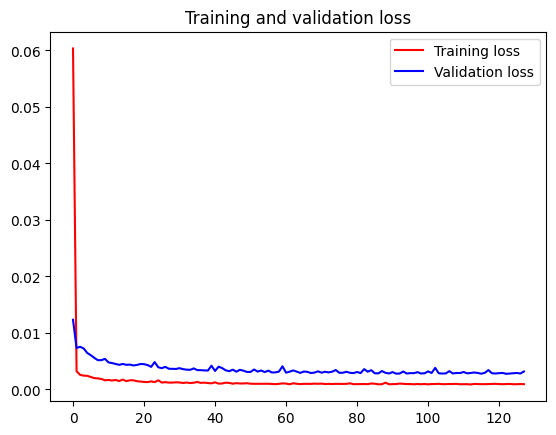

<Figure size 640x480 with 0 Axes>

In [38]:
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

Penjelasan:

Kode ini mengekstrak nilai loss (kerugian) dari proses training (loss) dan validasi (val_loss) yang tersimpan dalam objek history_lstm, kemudian membuat visualisasi perbandingan keduanya menggunakan matplotlib dengan sumbu x menunjukkan jumlah epoch (iterasi training) dan sumbu y menunjukkan nilai loss, dimana garis merah ('r') merepresentasikan training loss yang menunjukkan seberapa baik model belajar dari data latih, sementara garis biru ('b') menunjukkan validation loss yang mengindikasikan kemampuan generalisasi model pada data baru, dengan penambahan judul grafik ('Training and validation loss') dan legend untuk memudahkan interpretasi, sehingga kita bisa mengevaluasi apakah model mengalami underfitting/overfitting.
<br>

Berdasarkan pola kedua kurva tersebut dan menentukan titik optimal dimana validasi loss mulai menurun dengan training loss terus menurun.

Evaluasi menggunakan matriks evaluasi pada model LSTM:

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error_lstm(y_true_lstm, y_pred_lstm):
    y_true_lstm, y_pred_lstm = np.array(y_true_lstm), np.array(y_pred_lstm)
    return np.mean(np.abs((y_true_lstm - y_pred_lstm) / y_true_lstm)) * 100

# Hitung Metrik Evaluasi untuk Data Training LSTM
mse_train_lstm = mean_squared_error(original_ytrain_lstm, train_predict_lstm)
rmse_train_lstm = np.sqrt(mse_train_lstm)
mae_train_lstm = mean_absolute_error(original_ytrain_lstm, train_predict_lstm)
mape_train_lstm = mean_absolute_percentage_error_lstm(original_ytrain_lstm, train_predict_lstm)
r2_train_lstm = r2_score(original_ytrain_lstm, train_predict_lstm)

# Hitung Metrik Evaluasi untuk Data Testing LSTM
mse_test_lstm = mean_squared_error(original_ytest_lstm, test_predict_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)
mae_test_lstm = mean_absolute_error(original_ytest_lstm, test_predict_lstm)
mape_test_lstm = mean_absolute_percentage_error_lstm(original_ytest_lstm, test_predict_lstm)
r2_test_lstm = r2_score(original_ytest_lstm, test_predict_lstm)

print("Training Data Metrics LSTM:")
print(f"MSE: {mse_train_lstm:.2f}")
print(f"RMSE: {rmse_train_lstm:.2f}")
print(f"MAE: {mae_train_lstm:.2f}")
print(f"MAPE: {mape_train_lstm:.2f}%")
print(f"R-squared: {r2_train_lstm:.2f}")

print("\nTesting Data Metrics LSTM:")
print(f"MSE: {mse_test_lstm:.2f}")
print(f"RMSE: {rmse_test_lstm:.2f}")
print(f"MAE: {mae_test_lstm:.2f}")
print(f"MAPE: {mape_test_lstm:.2f}%")
print(f"R-squared: {r2_test_lstm:.2f}")

Training Data Metrics LSTM:
MSE: 2830.57
RMSE: 53.20
MAE: 41.89
MAPE: 0.62%
R-squared: 0.98

Testing Data Metrics LSTM:
MSE: 8912.81
RMSE: 94.41
MAE: 73.19
MAPE: 1.04%
R-squared: 0.96


**Penjelasan Kode:**  
Kode ini bertujuan untuk mengevaluasi kinerja model LSTM dalam memprediksi harga saham menggunakan lima metrik utama: *Mean Squared Error* (MSE), *Root Mean Squared Error* (RMSE), *Mean Absolute Error* (MAE), *Mean Absolute Percentage Error* (MAPE), dan *R-squared* (R²). Fungsi kustom `mean_absolute_percentage_error_lstm` menghitung MAPE dengan mengkonversi input ke array numpy terlebih dahulu, lalu menghitung rata-rata persentase error absolut. Metrik lainnya dihitung menggunakan fungsi bawaan scikit-learn (`mean_squared_error`, `mean_absolute_error`, `r2_score`), dengan RMSE diperoleh dari akar kuadrat MSE. Kode ini membandingkan prediksi model (`train_predict_lstm` dan `test_predict_lstm`) terhadap data aktual (`original_ytrain_lstm` dan `original_ytest_lstm`) untuk data latih dan uji, lalu mencetak hasilnya dalam format terstruktur.  

**Interpretasi Hasil:**  
Hasil evaluasi menunjukkan model LSTM memiliki kinerja yang sangat baik. Pada data latih, nilai R² sebesar 0.98 mengindikasikan model mampu menjelaskan 98% variasi data, dengan error relatif rendah (MAPE 0.62% dan RMSE 53.20). Di data uji, meskipun metrik error sedikit meningkat (RMSE 94.41 dan MAPE 1.04%), R² tetap tinggi (0.96), menandakan model dapat menggeneralisasi dengan baik. Selisih antara metrik latih dan uji (misalnya MSE latih 2830.57 vs uji 8912.81) menunjukkan sedikit overfitting, tetapi masih dalam batas wajar untuk prediksi deret waktu. MAPE di bawah 2% mengkonfirmasi akurasi model dalam memprediksi harga, dengan deviasi rata-rata hanya sekitar 1% dari nilai aktual, sehingga layak digunakan untuk aplikasi nyata.

## 2. Evaluasi Model CNN 1D

Menampilkan Plotting Loss dan Validasi Loss model CNN 1D:

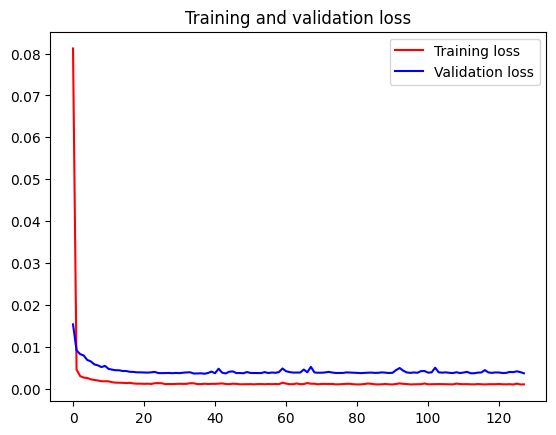

<Figure size 640x480 with 0 Axes>

In [40]:
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

Penjelasan:

Kode ini mengekstrak nilai loss (kerugian) dari proses training (loss) dan validasi (val_loss) yang tersimpan dalam objek history_cnn, kemudian membuat visualisasi perbandingan keduanya menggunakan matplotlib dengan sumbu x menunjukkan jumlah epoch (iterasi training) dan sumbu y menunjukkan nilai loss, dimana garis merah ('r') merepresentasikan training loss yang menunjukkan seberapa baik model belajar dari data latih, sementara garis biru ('b') menunjukkan validation loss yang mengindikasikan kemampuan generalisasi model pada data baru, dengan penambahan judul grafik ('Training and validation loss') dan legend untuk memudahkan interpretasi, sehingga kita bisa mengevaluasi apakah model mengalami underfitting/overfitting.
<br>

Berdasarkan pola kedua kurva tersebut dan menentukan titik optimal dimana validasi loss mulai menurun dengan training loss terus menurun.

Evaluasi menggunakan matriks evaluasi pada model CNN 1D:

In [41]:
def mean_absolute_percentage_error_cnn(y_true_cnn, y_pred_cnn):
    y_true_cnn, y_pred_cnn = np.array(y_true_cnn), np.array(y_pred_cnn)
    return np.mean(np.abs((y_true_cnn - y_pred_cnn) / y_true_cnn)) * 100

# Hitung metrik untuk data training CNN
mse_train_cnn = mean_squared_error(original_ytrain_cnn, train_predict_cnn)
rmse_train_cnn = np.sqrt(mse_train_cnn)
mae_train_cnn = mean_absolute_error(original_ytrain_cnn, train_predict_cnn)
mape_train_cnn = mean_absolute_percentage_error_cnn(original_ytrain_cnn, train_predict_cnn)
r2_train_cnn = r2_score(original_ytrain_cnn, train_predict_cnn)

# Hitung metrik untuk data testing CNN
mse_test_cnn = mean_squared_error(original_ytest_cnn, test_predict_cnn)
rmse_test_cnn = np.sqrt(mse_test_cnn)
mae_test_cnn = mean_absolute_error(original_ytest_cnn, test_predict_cnn)
mape_test_cnn = mean_absolute_percentage_error_cnn(original_ytest_cnn, test_predict_cnn)
r2_test_cnn = r2_score(original_ytest_cnn, test_predict_cnn)

print("\nTraining Data Metrics CNN:")
print(f"MSE: {mse_train_cnn:.4f}")
print(f"RMSE: {rmse_train_cnn:.4f}")
print(f"MAE: {mae_train_cnn:.4f}")
print(f"MAPE: {mape_train_cnn:.2f}%")
print(f"R-squared: {r2_train_cnn:.4f}")

print("\nTesting Data Metrics CNN:")
print(f"MSE: {mse_test_cnn:.4f}")
print(f"RMSE: {rmse_test_cnn:.4f}")
print(f"MAE: {mae_test_cnn:.4f}")
print(f"MAPE: {mape_test_cnn:.2f}%")
print(f"R-squared: {r2_test_cnn:.4f}")


Training Data Metrics CNN:
MSE: 2667.3326
RMSE: 51.6462
MAE: 39.1467
MAPE: 0.58%
R-squared: 0.9821

Testing Data Metrics CNN:
MSE: 10222.7068
RMSE: 101.1074
MAE: 76.4199
MAPE: 1.09%
R-squared: 0.9490


**Penjelasan Kode:** <br>
Kode di atas digunakan untuk mengevaluasi performa model Convolutional Neural Network (CNN) dengan menghitung berbagai metrik pada data training dan testing. Fungsi `mean_absolute_percentage_error_cnn` menghitung MAPE dengan mengkonversi input ke array NumPy, lalu menghitung rata-rata error relatif dalam persentase. Metrik lainnya seperti MSE, RMSE, MAE, dan R-squared dihitung menggunakan fungsi bawaan library scikit-learn. MSE mengukur rata-rata kuadrat error, RMSE adalah akar kuadrat MSE untuk satuan yang sama dengan data asli, MAE menghitung error absolut rata-rata, dan R-squared menilai seberapa baik model menjelaskan variabilitas data.  


**Interpretasi Hasil:**<br>
**Hasil evaluasi** menunjukkan performa model yang sangat baik pada data training dengan MSE 2667.33, RMSE 51.65, MAE 39.15, MAPE 0.58%, dan R-squared 0.9821, yang berarti model menjelaskan 98.21% variasi data. Pada data testing, metrik sedikit menurun (MSE 10222.71, RMSE 101.11, MAE 76.42, MAPE 1.09%, R-squared 0.9490), tetapi masih menunjukkan generalisasi yang baik tanpa overfitting parah, dengan MAPE di bawah 2% mengindikasikan akurasi prediksi yang tinggi.


## 3. Evaluasi Model GRU

Menampilkan Plotting Loss and Validation Loss model GRU:

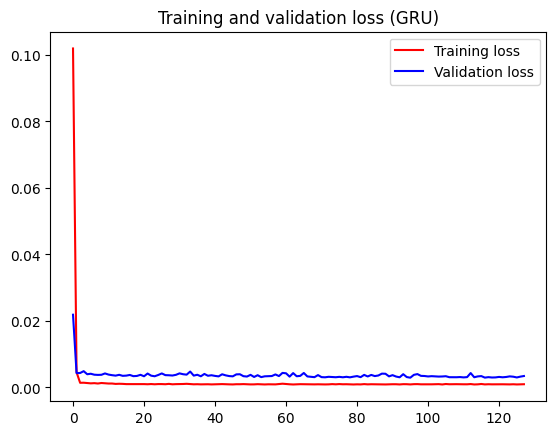

In [42]:
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss (GRU)')
plt.legend()
plt.show()

Penjelasan:

Kode ini mengekstrak nilai loss (kerugian) dari proses training (loss) dan validasi (val_loss) yang tersimpan dalam objek history_gru, kemudian membuat visualisasi perbandingan keduanya menggunakan matplotlib dengan sumbu x menunjukkan jumlah epoch (iterasi training) dan sumbu y menunjukkan nilai loss, dimana garis merah ('r') merepresentasikan training loss yang menunjukkan seberapa baik model belajar dari data latih, sementara garis biru ('b') menunjukkan validation loss yang mengindikasikan kemampuan generalisasi model pada data baru, dengan penambahan judul grafik ('Training and validation loss') dan legend untuk memudahkan interpretasi, sehingga kita bisa mengevaluasi apakah model mengalami underfitting/overfitting.
<br>

Berdasarkan pola kedua kurva tersebut dan menentukan titik optimal dimana validasi loss mulai menurun dengan training loss terus menurun.

Evaluasi menggunakan matriks evaluasi pada model GRU:

In [43]:
def mean_absolute_percentage_error_gru(y_true_gru, y_pred_gru):
    y_true_gru, y_pred_gru = np.array(y_true_gru), np.array(y_pred_gru)
    return np.mean(np.abs((y_true_gru - y_pred_gru) / y_true_gru)) * 100

# Hitung Metrik Evaluasi untuk Data Training GRU
mse_train_gru = mean_squared_error(original_ytrain_gru, train_predict_gru)
rmse_train_gru = np.sqrt(mse_train_gru)
mae_train_gru = mean_absolute_error(original_ytrain_gru, train_predict_gru)
mape_train_gru = mean_absolute_percentage_error_gru(original_ytrain_gru, train_predict_gru)
r2_train_gru = r2_score(original_ytrain_gru, train_predict_gru)

# Hitung Metrik Evaluasi untuk Data Testing GRU
mse_test_gru = mean_squared_error(original_ytest_gru, test_predict_gru)
rmse_test_gru = np.sqrt(mse_test_gru)
mae_test_gru = mean_absolute_error(original_ytest_gru, test_predict_gru)
mape_test_gru = mean_absolute_percentage_error_gru(original_ytest_gru, test_predict_gru)
r2_test_gru = r2_score(original_ytest_gru, test_predict_gru)

print("\nTraining Data Metrics GRU:")
print(f"MSE: {mse_train_gru:.2f}")
print(f"RMSE: {rmse_train_gru:.2f}")
print(f"MAE: {mae_train_gru:.2f}")
print(f"MAPE: {mape_train_gru:.2f}%")
print(f"R-squared: {r2_train_gru:.2f}")

print("\nTesting Data Metrics GRU:")
print(f"MSE: {mse_test_gru:.2f}")
print(f"RMSE: {rmse_test_gru:.2f}")
print(f"MAE: {mae_test_gru:.2f}")
print(f"MAPE: {mape_test_gru:.2f}%")
print(f"R-squared: {r2_test_gru:.2f}")


Training Data Metrics GRU:
MSE: 2532.11
RMSE: 50.32
MAE: 38.99
MAPE: 0.58%
R-squared: 0.98

Testing Data Metrics GRU:
MSE: 9640.97
RMSE: 98.19
MAE: 76.66
MAPE: 1.09%
R-squared: 0.95


**Penjelasan Kode:**<br>
Kode tersebut berfungsi untuk menghitung metrik evaluasi performa model GRU pada data training dan testing. Fungsi `mean_absolute_percentage_error_gru` dibuat khusus untuk menghitung MAPE (Mean Absolute Percentage Error) dengan mengonversi nilai aktual (`y_true_gru`) dan prediksi (`y_pred_gru`) ke array NumPy, kemudian menghitung rata-rata persentase error absolut. Metrik lainnya dihitung menggunakan fungsi dari scikit-learn: `mean_squared_error` untuk MSE, `np.sqrt` untuk RMSE (akar kuadrat MSE), `mean_absolute_error` untuk MAE, dan `r2_score` untuk R-squared. Hasilnya kemudian dicetak dalam format yang rapi untuk data training dan testing.  


**Hasil Evaluasi:**<br>
Pada data training, model GRU menunjukkan performa yang sangat baik dengan MSE 2532.11, RMSE 50.32, MAE 38.99, MAPE 0.58%, dan R-squared 0.98, yang mengindikasikan model mampu menjelaskan 98% variasi data training dengan error yang sangat rendah. Sementara pada data testing, metriknya sedikit menurun (MSE 9640.97, RMSE 98.19, MAE 76.66, MAPE 1.09%, R-squared 0.95), tetapi tetap menunjukkan generalisasi yang baik dengan MAPE di bawah 1.1% dan R-squared yang tinggi (95%), menandakan model tidak mengalami overfitting parah dan prediksinya cukup akurat untuk data baru. Perbandingan antara metrik training dan testing juga menunjukkan konsistensi model GRU dalam memprediksi data unseen.

## 4. Kesimpulan

In [44]:
# membuat kamus berdasarkan hasil
results = {
    'Model': ['LSTM', 'CNN', 'GRU'],
    'MSE_Train': [mse_train_lstm, mse_train_cnn, mse_train_gru],
    'RMSE_Train': [rmse_train_lstm, rmse_train_cnn, rmse_train_gru],
    'MAE_Train': [mae_train_lstm, mae_train_cnn, mae_train_gru],
    'MAPE_Train': [mape_train_lstm, mape_train_cnn, mape_train_gru],
    'R2_Train': [r2_train_lstm, r2_train_cnn, r2_train_gru],
    'MSE_Test': [mse_test_lstm, mse_test_cnn, mse_test_gru],
    'RMSE_Test': [rmse_test_lstm, rmse_test_cnn, rmse_test_gru],
    'MAE_Test': [mae_test_lstm, mae_test_cnn, mae_test_gru],
    'MAPE_Test': [mape_test_lstm, mape_test_cnn, mape_test_gru],
    'R2_Test': [r2_test_lstm, r2_test_cnn, r2_test_gru],
}

# Membuat dataframe berasarkan result(hasil)
df_results = pd.DataFrame(results)
print(df_results)

# Sortir berdasarkan R2
df_results_sorted = df_results.sort_values(by=['MSE_Test', 'R2_Test'], ascending=[True, True])
print("\nModel terbaik berdasarkan Evaluasi:")
df_results_sorted

  Model    MSE_Train  RMSE_Train  MAE_Train  MAPE_Train  R2_Train  \
0  LSTM  2830.568865   53.203091  41.887284    0.617084  0.980952   
1   CNN  2667.332567   51.646225  39.146746    0.579453  0.982050   
2   GRU  2532.112498   50.320100  38.989871    0.575966  0.982960   

       MSE_Test   RMSE_Test   MAE_Test  MAPE_Test   R2_Test  
0   8912.807054   94.407664  73.190241   1.042641  0.955528  
1  10222.706768  101.107402  76.419919   1.093515  0.948992  
2   9640.965567   98.188419  76.659100   1.085344  0.951895  

Model terbaik berdasarkan Evaluasi:


,Model,MSE_Train,RMSE_Train,MAE_Train,MAPE_Train,R2_Train,MSE_Test,RMSE_Test,MAE_Test,MAPE_Test,R2_Test
0,LSTM,2830.568865,53.203091,41.887284,0.617084,0.980952,8912.807054,94.407664,73.190241,1.042641,0.955528
2,GRU,2532.112498,50.320100,38.989871,0.575966,0.982960,9640.965567,98.188419,76.659100,1.085344,0.951895
1,CNN,2667.332567,51.646225,39.146746,0.579453,0.982050,10222.706768,101.107402,76.419919,1.093515,0.948992


**Penjelasan Kode**:

Kode ini bertujuan untuk mengumpulkan dan membandingkan hasil evaluasi tiga model deep learning (LSTM, CNN, dan GRU) dalam bentuk DataFrame yang terstruktur. Pertama, dibuat sebuah dictionary `results` yang menyimpan berbagai metrik evaluasi (MSE, RMSE, MAE, MAPE, dan R-squared) untuk data training dan testing dari ketiga model. Dictionary ini kemudian dikonversi menjadi DataFrame pandas (`df_results`) untuk memudahkan analisis. Selanjutnya, DataFrame diurutkan berdasarkan MSE testing (dari yang terkecil) dan R-squared testing (dari yang terbesar) untuk menentukan model terbaik, dimana hasil sorting disimpan dalam `df_results_sorted`.

**Interpretasi Hasil Matriks Evaluasi**:

Berdasarkan analisis prediksi harga IHSG menggunakan tiga model deep learning (LSTM, CNN, dan GRU), dapat disimpulkan bahwa model LSTM menunjukkan performa terbaik dalam memprediksi harga penutupan IHSG yang memiliki volatilitas tinggi.

Hasil evaluasi kuantitatif menunjukkan LSTM mencapai MSE testing terendah (8912.81), R² testing tertinggi (0.9555), dan MAPE testing 1.04%, mengungguli GRU (MSE 9640.97, R² 0.9519) dan CNN (MSE 10222.71, R² 0.9490). Nilai MAPE semua model dibawah 1.1% membuktikan akurasi prediksi yang tinggi, dengan LSTM memiliki kemampuan terbaik dalam menangkap pola temporal data IHSG. Solusi ini secara efektif menjawab problem statement mengenai kesulitan prediksi di pasar volatil, dimana LSTM sebagai model terpilih dapat menjadi dasar sistem pendukung keputusan investasi yang mengurangi risiko kerugian.

## 5. Implementasi

Simpan Model:

In [45]:
import tensorflow as tf

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_lstm) # Change to model_lstm

# Enable resource variables (if needed)
converter.experimental_enable_resource_variables = True

# Set supported ops to include Select TF ops (if needed)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS
]

tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('lstm_model.tflite', 'wb') as f:  # Change filename
    f.write(tflite_model)

Saved artifact at '/tmp/tmpkyg83gr8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136072771346768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136072771349072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136072771348880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136072771348304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136072771350608: TensorSpec(shape=(), dtype=tf.resource, name=None)


Penjelasan Kode:

Kode diatas melakukan konversi model LSTM yang telah dilatih ke format TensorFlow Lite untuk optimasi deployment di perangkat mobile/edge, dimulai dengan mengimpor library TensorFlow dan menginisialisasi converter menggunakan `tf.lite.TFLiteConverter.from_keras_model(model_lstm)`, kemudian mengaktifkan fitur eksperimental resource variables dan mengatur operasi yang didukung (termasuk operasi bawaan TFLite dan operasi khusus TensorFlow) melalui `target_spec.supported_ops`. Proses konversi dijalankan dengan `converter.convert()` yang menghasilkan model dalam format TFLite, yang kemudian disimpan ke file 'lstm_model.tflite' menggunakan operasi file biner, sehingga model yang telah dikonversi ini siap digunakan untuk inferensi efisien di perangkat dengan sumber daya terbatas seperti smartphone atau perangkat IoT, dengan ukuran lebih kecil dan performa lebih cepat dibanding model aslinya.

Data Sebelum dan Sesudah Prediksi:

In [46]:
import plotly.express as px
from itertools import cycle

look_back = time_step

train_predict_plot = np.empty_like(maindf_cleaned_split[['Close']])
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_lstm) + look_back, :] = train_predict_lstm
print("Train predicted data: ", train_predict_plot.shape)

test_predict_plot = np.empty_like(maindf_cleaned_split[['Close']])
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_lstm) + (look_back * 2) + 1:len(maindf_cleaned_split[['Close']]) - 1, :] = test_predict_lstm
print("Test predicted data: ", test_predict_plot.shape)

plotdf = pd.DataFrame({'Date': maindf_cleaned_split.index,
                       'original_close': maindf_cleaned_split['Close'],
                       'train_predicted_close': train_predict_plot.reshape(1, -1)[0].tolist(),
                       'test_predicted_close': test_predict_plot.reshape(1, -1)[0].tolist()})


names = cycle(['Data Harga Asli', 'Data Harga(berdsasarkan data latih)', 'Data Harga(berdsasarkan data Uji)'])

fig = px.line(plotdf, x=plotdf['Date'], y=[plotdf['original_close'], plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value': 'Harga IHSG(^JKSE)', 'Date': 'Tanggal'})
fig.update_layout(title_text='Komparasi dari Harga Penutupan asli dengan Harga Penutupan Hasil Prediksi',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1000, 1)
Test predicted data:  (1000, 1)


Penjelasan Kode:

Kode ini memvisualisasikan perbandingan antara harga penutupan aktual IHSG dengan hasil prediksi model LSTM menggunakan Plotly Express dengan terlebih dahulu mempersiapkan data prediksi melalui pembuatan array kosong `train_predict_plot` dan `test_predict_plot` yang diisi nilai NaN kemudian diisi dengan hasil prediksi training pada posisi setelah `look_back` periode serta hasil prediksi testing setelah periode training ditambah buffer `look_back`, lalu membuat DataFrame `plotdf` yang berisi tanggal, harga asli, dan hasil prediksi training maupun testing sebelum akhirnya membuat visualisasi line chart interaktif dengan tiga garis (data asli, prediksi training, dan prediksi testing) yang dikonfigurasi dengan judul "Komparasi dari Harga Penutupan asli dengan Harga Penutupan Hasil Prediksi", background putih tanpa gridlines, font size 15, serta legenda yang jelas, sehingga menghasilkan grafik interaktif yang memungkinkan analisis performa model melalui zoom dan hover untuk mengevaluasi seberapa baik prediksi mengikuti pola data aktual serta perbedaan performa antara data training dan testing.

Contoh penggunaan untuk prediksi 7 hari kedepan:

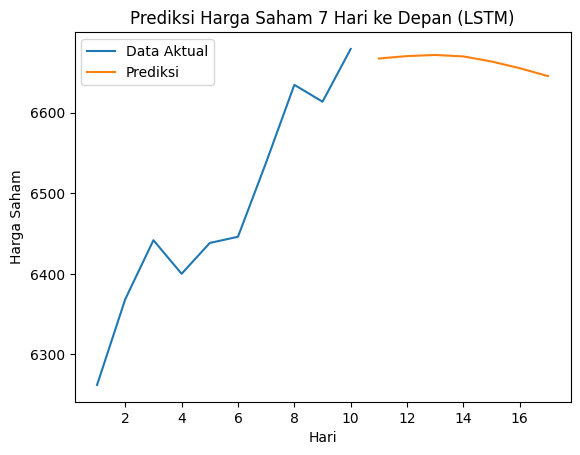

In [47]:
# Predict the next 7 days using LSTM
x_input = test_data_scaled[-10:].values  # Taking the last 10 days' data
x_input = x_input.reshape(1, -1, 1)  # Reshaping for LSTM input

temp_input = list(x_input[0].flatten())
lst_output = []
n_steps = 10

i = 0
while i < 7:
    if len(temp_input) > 10:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1, 1)
        yhat = model_lstm.predict(x_input, verbose=0)  # Using model_lstm for prediction
        temp_input.extend(yhat[0].flatten().tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_lstm.predict(x_input, verbose=0)  # Using model_lstm for prediction
        temp_input.extend(yhat[0].flatten().tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

day_new = np.arange(1, 11)
day_pred = np.arange(11, 18)

plt.plot(day_new, scaler.inverse_transform(test_data_scaled[-10:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.title('Prediksi Harga Saham 7 Hari ke Depan (LSTM)')  # Updated title
plt.xlabel('Hari')
plt.ylabel('Harga Saham')
plt.legend(['Data Aktual', 'Prediksi'])
plt.show()

Penjelasan Kode:

Kode ini memulai dengan mengambil 10 hari terakhir dari data testing yang sudah di-scale (`test_data_scaled[-10:]`) dan mengubahnya menjadi format yang sesuai untuk input model LSTM melalui proses reshaping. Proses prediksi dilakukan secara iteratif selama 7 hari (7 iterasi) dengan menggunakan model LSTM (`model_lstm`), dimana setiap prediksi hari berikutnya didasarkan pada output prediksi sebelumnya (menggunakan sliding window approach). Hasil prediksi disimpan dalam list `lst_output`, sementara `temp_input` digunakan untuk menjaga urutan input yang sesuai dengan lookback period (10 hari). Setelah mendapatkan semua prediksi, kode kemudian melakukan inverse transform menggunakan scaler untuk mengembalikan nilai prediksi ke skala aslinya dan memvisualisasikan hasilnya dengan matplotlib, menampilkan perbandingan antara 10 hari data aktual terakhir (day 1-10) dengan 7 hari prediksi (day 11-18) dalam sebuah grafik line chart yang dilengkapi dengan judul "Prediksi Harga Saham 7 Hari ke Depan (LSTM)", label sumbu (hari dan harga saham), serta legenda yang membedakan antara data aktual dan prediksi. Visualisasi ini membantu pengguna memahami tren prediksi jangka pendek berdasarkan pola historis yang telah dipelajari oleh model LSTM.

## 6. Evaluasi Keseluruhan

**Kesimpulan Berdasarkan Business Understanding dan Hasil Evaluasi Model:**  

1. **Pencapaian Tujuan Utama**  
   Proyek ini berhasil menghasilkan model prediksi harga IHSG dengan error yang rendah melalui komparasi tiga model deep learning. LSTM menempati posisi terbaik dengan **MAPE testing 1.04%** (error prediksi <2%) dan **R² testing 0.96**, diikuti GRU (MAPE 1.09%, R² 0.95) dan CNN (MAPE 1.09%, R² 0.95). Nilai MSE testing terendah pada LSTM (8912.81) menunjukkan kemampuan terbaik dalam mengurangi deviasi prediksi, menjawab kebutuhan akan sistem prediksi akurat di pasar volatil seperti IHSG.  

2. **Penyelesaian Problem Statement**  
   - **Volatilitas Tinggi**: Model LSTM terbukti efektif menangkap pola temporal data IHSG dengan R² tinggi (0.96), mengindikasikan 96% variasi harga testing dapat dijelaskan oleh model. Ini membantu investor mengurangi ketidakpastian dalam pengambilan keputusan.  
   - **Minimnya Riset Komparatif**: Studi ini mengisi gap penelitian dengan membuktikan LSTM lebih unggul daripada CNN dan GRU untuk prediksi IHSG, sekaligus memberikan referensi terukur bagi industri keuangan.  

3. **Insight Kuantitatif dan Rekomendasi**  
   - **LSTM** cocok untuk prediksi jangka pendek karena arsitekturnya yang dirancang untuk data sekuensial, terlihat dari MAPE terendah (1.04%) yang merefleksikan akurasi relatif stabil meski harga fluktuatif.  
   - **GRU** menempati posisi kedua dengan performa mendekati LSTM, cocok sebagai alternatif jika kebutuhan komputasi lebih efisien.  
   - **CNN** kurang optimal dalam menangkap pola temporal IHSG, terlihat dari MSE testing tertinggi (10222.71), sehingga tidak direkomendasikan untuk kasus serupa.  

4. **Implikasi Praktis**  
   - Investor dan analis dapat memanfaatkan model LSTM untuk memprediksi tren harian/semingguan IHSG dengan confidence level tinggi (R² >0.95), membantu menyusun strategi *entry/exit point* yang lebih terukur.  
   - Institusi keuangan dapat mengadopsi framework ini sebagai dasar pengembangan sistem prediksi otomatis yang terintegrasi dengan analisis fundamental, mengurangi risiko kerugian akibat volatilitas tak terduga.
   - Prediksi 7 hari ke depan (`plt.plot`) dengan menggunakan model LSTM juga menunjukkan konsistensi model dalam memperluas pola historis ke masa depan, meskipun akurasi mungkin menurun seiring penambahan horizon waktu (efek *forecasting error accumulation*).   

5. **Keterbatasan dan Saran Pengembangan**  
   - Meski LSTM terbaik, selisih performa antar model tidak signifikan (ΔR² testing <0.01 antara LSTM dan GRU). Hybrid model (LSTM-GRU) dapat dieksplorasi untuk memanfaatkan keunggulan kedua arsitektur.  

**Ringkasan Final**  
Proyek ini membuktikan bahwa penerapan deep learning, khususnya LSTM, mampu menjawab tantangan prediksi harga IHSG di tengah volatilitas tinggi. Dengan error prediksi di bawah 1.1% (MAPE) dan kemampuan menjelaskan >95% variasi data (R²), model ini menjadi solusi yang feasible untuk mendukung keputusan investasi berbasis data.

Hasil komparasi ketiga model juga memberikan panduan empiris bagi industri dalam memilih arsitektur AI yang optimal, sekaligus membuka peluang pengembangan sistem prediksi yang lebih kompleks dan terintegrasi di masa depan. Implementasi TFLite membuka peluang adopsi teknologi AI di perangkat retail investor, menjadikan prediksi pasar lebih terbuka dan data-driven.

In [48]:
!pip freeze > requirements.txt